<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund_/blob/master/autogluon_next_day_graph_M1_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# !pip install jedi
# !pip install Pillow==9.3

In [43]:
# !pip install autogluon
# !pip install pillow==8.4.0
# !pip install --upgrade mxnet

# #designed for Jupyter/kaggle/colab
# import pandas as pd
# import numpy as np
# #import matplotlib for plotting 
# import matplotlib.pyplot as plt
# %matplotlib inline
# #import normalization
# from sklearn import preprocessing
# #autogluon
# from autogluon.tabular import TabularDataset, TabularPredictor  

In [44]:
#metatrader5 file format
df=pd.read_csv('/content/drive/MyDrive/csv_mt5/EURUSD_M1_202101040001_202303032354.csv')

In [45]:
print(df.head())
print(df.tail())
df.info()

  <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0  2021.01.04\t00:01:00\t1.22395\t1.22395\t1.2239...                        
1  2021.01.04\t00:02:00\t1.22393\t1.22396\t1.2237...                        
2  2021.01.04\t00:03:00\t1.22374\t1.22374\t1.2236...                        
3  2021.01.04\t00:04:00\t1.22374\t1.22374\t1.2228...                        
4  2021.01.04\t00:05:00\t1.22318\t1.22337\t1.2231...                        
       <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
810239  2023.03.03\t23:50:00\t1.06332\t1.06332\t1.0632...                        
810240  2023.03.03\t23:51:00\t1.06323\t1.06327\t1.0632...                        
810241  2023.03.03\t23:52:00\t1.06326\t1.06330\t1.0632...                        
810242  2023.03.03\t23:53:00\t1.06329\t1.06342\t1.0632...                        
810243  2023.03.03\t23:54:00\t1.06327\t1.06332\t1.0632...                        
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [46]:
df.columns=['header']


In [47]:
df = df.header.str.split('\t', expand=True)


In [48]:
df

,0,1,2,3,4,5,6,7,8
0,2021.01.04,00:01:00,1.22395,1.22395,1.22395,1.22395,1,0,60
1,2021.01.04,00:02:00,1.22393,1.22396,1.22373,1.22373,4,0,38
2,2021.01.04,00:03:00,1.22374,1.22374,1.22366,1.22373,4,0,30
3,2021.01.04,00:04:00,1.22374,1.22374,1.22280,1.22298,9,0,32
4,2021.01.04,00:05:00,1.22318,1.22337,1.22318,1.22330,19,0,28
...,...,...,...,...,...,...,...,...,...
810239,2023.03.03,23:50:00,1.06332,1.06332,1.06323,1.06323,38,0,2
810240,2023.03.03,23:51:00,1.06323,1.06327,1.06322,1.06325,14,0,9
810241,2023.03.03,23:52:00,1.06326,1.06330,1.06326,1.06330,19,0,8
810242,2023.03.03,23:53:00,1.06329,1.06342,1.06326,1.06328,35,0,2


In [49]:
#choose range of data for backtesting
df['date_time'] = df[0] + ' ' + df[1]
pd.to_datetime(df.date_time)
df.set_index('date_time',inplace=True)
df.drop(columns=[0,1], inplace=True)
df

,2,3,4,5,6,7,8
date_time,,,,,,,
2021.01.04 00:01:00,1.22395,1.22395,1.22395,1.22395,1,0,60
2021.01.04 00:02:00,1.22393,1.22396,1.22373,1.22373,4,0,38
2021.01.04 00:03:00,1.22374,1.22374,1.22366,1.22373,4,0,30
2021.01.04 00:04:00,1.22374,1.22374,1.22280,1.22298,9,0,32
2021.01.04 00:05:00,1.22318,1.22337,1.22318,1.22330,19,0,28
...,...,...,...,...,...,...,...
2023.03.03 23:50:00,1.06332,1.06332,1.06323,1.06323,38,0,2
2023.03.03 23:51:00,1.06323,1.06327,1.06322,1.06325,14,0,9
2023.03.03 23:52:00,1.06326,1.06330,1.06326,1.06330,19,0,8


In [50]:
#df_close_col = pd.DataFrame(data=df.iloc[:,5].tail(576000))
df_c = pd.DataFrame(df.loc['2000.12.01 00:00:00':'2023.03.04 00:00:00',5])

In [51]:
df_c

,5
date_time,
2021.01.04 00:01:00,1.22395
2021.01.04 00:02:00,1.22373
2021.01.04 00:03:00,1.22373
2021.01.04 00:04:00,1.22298
2021.01.04 00:05:00,1.22330
...,...
2023.03.03 23:50:00,1.06323
2023.03.03 23:51:00,1.06325
2023.03.03 23:52:00,1.06330


In [52]:
#df_C = df_c.reset_index(level=0)

In [53]:
#df_C['index'] = df_c.index
df_c

,5
date_time,
2021.01.04 00:01:00,1.22395
2021.01.04 00:02:00,1.22373
2021.01.04 00:03:00,1.22373
2021.01.04 00:04:00,1.22298
2021.01.04 00:05:00,1.22330
...,...
2023.03.03 23:50:00,1.06323
2023.03.03 23:51:00,1.06325
2023.03.03 23:52:00,1.06330


In [54]:
df_c.reset_index(inplace=True)
df_c

,date_time,5
0,2021.01.04 00:01:00,1.22395
1,2021.01.04 00:02:00,1.22373
2,2021.01.04 00:03:00,1.22373
3,2021.01.04 00:04:00,1.22298
4,2021.01.04 00:05:00,1.22330
...,...,...
810239,2023.03.03 23:50:00,1.06323
810240,2023.03.03 23:51:00,1.06325
810241,2023.03.03 23:52:00,1.06330
810242,2023.03.03 23:53:00,1.06328


In [55]:
df_c.drop(['date_time'], axis=1, inplace=True)
df_c

,5
0,1.22395
1,1.22373
2,1.22373
3,1.22298
4,1.22330
...,...
810239,1.06323
810240,1.06325
810241,1.06330
810242,1.06328


In [56]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810244 entries, 0 to 810243
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   5       810244 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


In [57]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810244 entries, 0 to 810243
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   5       810244 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


In [58]:
df_close_col = df_c

In [59]:
df_close_col[5] = df_close_col[5].astype(float, errors = 'raise')

In [60]:
df_close_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810244 entries, 0 to 810243
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   5       810244 non-null  float64
dtypes: float64(1)
memory usage: 6.2 MB


In [61]:
df_close_col.isnull().sum()  

5    0
dtype: int64

In [62]:
##include date time at column index 0,1###


In [63]:
df_close_col

,5
0,1.22395
1,1.22373
2,1.22373
3,1.22298
4,1.22330
...,...
810239,1.06323
810240,1.06325
810241,1.06330
810242,1.06328


In [64]:
###df281 to df320###
df320 = pd.DataFrame(data=df_close_col.iloc[-462240:-460800])
df320['row_num']=np.arange(len(df320))
df320.set_index('row_num',inplace=True)
df320 = df320.rename(columns={5:'day_320'})
print(df320)

df319 = pd.DataFrame(data=df_close_col.iloc[-460800:-459360])
df319['row_num']=np.arange(len(df319))
df319.set_index('row_num',inplace=True)
df319 = df319.rename(columns={5:'day_319'})
print(df319)

df318 = pd.DataFrame(data=df_close_col.iloc[-459360:-457920])
df318['row_num']=np.arange(len(df318))
df318.set_index('row_num',inplace=True)
df318 = df318.rename(columns={5:'day_318'})
print(df318)

df317 = pd.DataFrame(data=df_close_col.iloc[-457920:-456480])
df317['row_num']=np.arange(len(df317))
df317.set_index('row_num',inplace=True)
df317 = df317.rename(columns={5:'day_317'})
print(df317)

df316 = pd.DataFrame(data=df_close_col.iloc[-456480:-455040])
df316['row_num']=np.arange(len(df316))
df316.set_index('row_num',inplace=True)
df316 = df316.rename(columns={5:'day_316'})
print(df316)

df315 = pd.DataFrame(data=df_close_col.iloc[-455040:-453600])
df315['row_num']=np.arange(len(df315))
df315.set_index('row_num',inplace=True)
df315 = df315.rename(columns={5:'day_315'})
print(df315)

df314 = pd.DataFrame(data=df_close_col.iloc[-453600:-452160])
df314['row_num']=np.arange(len(df314))
df314.set_index('row_num',inplace=True)
df314 = df314.rename(columns={5:'day_314'})
print(df314)

df313 = pd.DataFrame(data=df_close_col.iloc[-452160:-450720])
df313['row_num']=np.arange(len(df313))
df313.set_index('row_num',inplace=True)
df313 = df313.rename(columns={5:'day_313'})
print(df313)

df312 = pd.DataFrame(data=df_close_col.iloc[-450720:-449280])
df312['row_num']=np.arange(len(df312))
df312.set_index('row_num',inplace=True)
df312 = df312.rename(columns={5:'day_312'})
print(df312)

df311 = pd.DataFrame(data=df_close_col.iloc[-449280:-447840])
df311['row_num']=np.arange(len(df311))
df311.set_index('row_num',inplace=True)
df311 = df311.rename(columns={5:'day_311'})
print(df311)

df310 = pd.DataFrame(data=df_close_col.iloc[-447840:-446400])
df310['row_num']=np.arange(len(df310))
df310.set_index('row_num',inplace=True)
df310 = df310.rename(columns={5:'day_310'})
print(df310)

df309 = pd.DataFrame(data=df_close_col.iloc[-446400:-444960])
df309['row_num']=np.arange(len(df309))
df309.set_index('row_num',inplace=True)
df309 = df309.rename(columns={5:'day_309'})
print(df309)

df308 = pd.DataFrame(data=df_close_col.iloc[-444960:-443520])
df308['row_num']=np.arange(len(df308))
df308.set_index('row_num',inplace=True)
df308 = df308.rename(columns={5:'day_308'})
print(df308)

df307 = pd.DataFrame(data=df_close_col.iloc[-443520:-442080])
df307['row_num']=np.arange(len(df307))
df307.set_index('row_num',inplace=True)
df307 = df307.rename(columns={5:'day_307'})
print(df307)

df306 = pd.DataFrame(data=df_close_col.iloc[-442080:-440640])
df306['row_num']=np.arange(len(df306))
df306.set_index('row_num',inplace=True)
df306 = df306.rename(columns={5:'day_306'})
print(df306)

df305 = pd.DataFrame(data=df_close_col.iloc[-440640:-439200])
df305['row_num']=np.arange(len(df305))
df305.set_index('row_num',inplace=True)
df305 = df305.rename(columns={5:'day_305'})
print(df305)

df304 = pd.DataFrame(data=df_close_col.iloc[-439200:-437760])
df304['row_num']=np.arange(len(df304))
df304.set_index('row_num',inplace=True)
df304 = df304.rename(columns={5:'day_304'})
print(df304)

df303 = pd.DataFrame(data=df_close_col.iloc[-437760:-436320])
df303['row_num']=np.arange(len(df303))
df303.set_index('row_num',inplace=True)
df303 = df303.rename(columns={5:'day_303'})
print(df303)

df302 = pd.DataFrame(data=df_close_col.iloc[-436320:-434880])
df302['row_num']=np.arange(len(df302))
df302.set_index('row_num',inplace=True)
df302 = df302.rename(columns={5:'day_302'})
print(df302)

df301 = pd.DataFrame(data=df_close_col.iloc[-434880:-433440])
df301['row_num']=np.arange(len(df301))
df301.set_index('row_num',inplace=True)
df301 = df301.rename(columns={5:'day_301'})
print(df301)

df300 = pd.DataFrame(data=df_close_col.iloc[-433440:-432000])
df300['row_num']=np.arange(len(df300))
df300.set_index('row_num',inplace=True)
df300 = df300.rename(columns={5:'day_300'})
print(df300)

df299 = pd.DataFrame(data=df_close_col.iloc[-432000:-430560])
df299['row_num']=np.arange(len(df299))
df299.set_index('row_num',inplace=True)
df299 = df299.rename(columns={5:'day_299'})
print(df299)

df298 = pd.DataFrame(data=df_close_col.iloc[-430560:-429120])
df298['row_num']=np.arange(len(df298))
df298.set_index('row_num',inplace=True)
df298 = df298.rename(columns={5:'day_298'})
print(df298)

df297 = pd.DataFrame(data=df_close_col.iloc[-429120:-427680])
df297['row_num']=np.arange(len(df297))
df297.set_index('row_num',inplace=True)
df297 = df297.rename(columns={5:'day_297'})
print(df297)

df296 = pd.DataFrame(data=df_close_col.iloc[-427680:-426240])
df296['row_num']=np.arange(len(df296))
df296.set_index('row_num',inplace=True)
df296 = df296.rename(columns={5:'day_296'})
print(df296)

df295 = pd.DataFrame(data=df_close_col.iloc[-426240:-424800])
df295['row_num']=np.arange(len(df295))
df295.set_index('row_num',inplace=True)
df295 = df295.rename(columns={5:'day_295'})
print(df295)

df294 = pd.DataFrame(data=df_close_col.iloc[-424800:-423360])
df294['row_num']=np.arange(len(df294))
df294.set_index('row_num',inplace=True)
df294 = df294.rename(columns={5:'day_294'})
print(df294)

df293 = pd.DataFrame(data=df_close_col.iloc[-423360:-421920])
df293['row_num']=np.arange(len(df293))
df293.set_index('row_num',inplace=True)
df293 = df293.rename(columns={5:'day_293'})
print(df293)

df292 = pd.DataFrame(data=df_close_col.iloc[-421920:-420480])
df292['row_num']=np.arange(len(df292))
df292.set_index('row_num',inplace=True)
df292 = df292.rename(columns={5:'day_292'})
print(df292)

df291 = pd.DataFrame(data=df_close_col.iloc[-420480:-419040])
df291['row_num']=np.arange(len(df291))
df291.set_index('row_num',inplace=True)
df291 = df291.rename(columns={5:'day_291'})
print(df291)

df290 = pd.DataFrame(data=df_close_col.iloc[-419040:-417600])
df290['row_num']=np.arange(len(df290))
df290.set_index('row_num',inplace=True)
df290 = df290.rename(columns={5:'day_290'})
print(df290)

df289 = pd.DataFrame(data=df_close_col.iloc[-417600:-416160])
df289['row_num']=np.arange(len(df289))
df289.set_index('row_num',inplace=True)
df289 = df289.rename(columns={5:'day_289'})
print(df289)

df288 = pd.DataFrame(data=df_close_col.iloc[-416160:-414720])
df288['row_num']=np.arange(len(df288))
df288.set_index('row_num',inplace=True)
df288 = df288.rename(columns={5:'day_288'})
print(df288)

df287 = pd.DataFrame(data=df_close_col.iloc[-414720:-413280])
df287['row_num']=np.arange(len(df287))
df287.set_index('row_num',inplace=True)
df287 = df287.rename(columns={5:'day_287'})
print(df287)

df286 = pd.DataFrame(data=df_close_col.iloc[-413280:-411840])
df286['row_num']=np.arange(len(df286))
df286.set_index('row_num',inplace=True)
df286 = df286.rename(columns={5:'day_286'})
print(df286)

df285 = pd.DataFrame(data=df_close_col.iloc[-411840:-410400])
df285['row_num']=np.arange(len(df285))
df285.set_index('row_num',inplace=True)
df285 = df285.rename(columns={5:'day_285'})
print(df285)

df284 = pd.DataFrame(data=df_close_col.iloc[-410400:-408960])
df284['row_num']=np.arange(len(df284))
df284.set_index('row_num',inplace=True)
df284 = df284.rename(columns={5:'day_284'})
print(df284)

df283 = pd.DataFrame(data=df_close_col.iloc[-408960:-407520])
df283['row_num']=np.arange(len(df283))
df283.set_index('row_num',inplace=True)
df283 = df283.rename(columns={5:'day_283'})
print(df283)

df282 = pd.DataFrame(data=df_close_col.iloc[-407520:-406080])
df282['row_num']=np.arange(len(df282))
df282.set_index('row_num',inplace=True)
df282 = df282.rename(columns={5:'day_282'})
print(df282)

df281 = pd.DataFrame(data=df_close_col.iloc[-406080:-404640])
df281['row_num']=np.arange(len(df281))
df281.set_index('row_num',inplace=True)
df281 = df281.rename(columns={5:'day_281'})
print(df281)

         day_320
row_num         
0        1.12939
1        1.12949
2        1.12944
3        1.12944
4        1.12934
...          ...
1435     1.13306
1436     1.13307
1437     1.13306
1438     1.13304
1439     1.13295

[1440 rows x 1 columns]
         day_319
row_num         
0        1.13294
1        1.13291
2        1.13284
3        1.13285
4        1.13286
...          ...
1435     1.12991
1436     1.12994
1437     1.12994
1438     1.12982
1439     1.12969

[1440 rows x 1 columns]
         day_318
row_num         
0        1.12971
1        1.12976
2        1.12970
3        1.12982
4        1.12982
...          ...
1435     1.12956
1436     1.12949
1437     1.12954
1438     1.12951
1439     1.12950

[1440 rows x 1 columns]
         day_317
row_num         
0        1.12941
1        1.12923
2        1.12926
3        1.12927
4        1.12917
...          ...
1435     1.12830
1436     1.12820
1437     1.12815
1438     1.12827
1439     1.12824

[1440 rows x 1 columns]
         day_316

In [65]:
###df241 to df280###

df280 = pd.DataFrame(data=df_close_col.iloc[-404640:-403200])
df280['row_num']=np.arange(len(df280))
df280.set_index('row_num',inplace=True)
df280 = df280.rename(columns={5:'day_280'})
print(df280)

df279 = pd.DataFrame(data=df_close_col.iloc[-403200:-401760])
df279['row_num']=np.arange(len(df279))
df279.set_index('row_num',inplace=True)
df279 = df279.rename(columns={5:'day_279'})
print(df279)

df278 = pd.DataFrame(data=df_close_col.iloc[-401760:-400320])
df278['row_num']=np.arange(len(df278))
df278.set_index('row_num',inplace=True)
df278 = df278.rename(columns={5:'day_278'})
print(df278)

df277 = pd.DataFrame(data=df_close_col.iloc[-400320:-398880])
df277['row_num']=np.arange(len(df277))
df277.set_index('row_num',inplace=True)
df277 = df277.rename(columns={5:'day_277'})
print(df277)

df276 = pd.DataFrame(data=df_close_col.iloc[-398880:-397440])
df276['row_num']=np.arange(len(df276))
df276.set_index('row_num',inplace=True)
df276 = df276.rename(columns={5:'day_276'})
print(df276)

df275 = pd.DataFrame(data=df_close_col.iloc[-397440:-396000])
df275['row_num']=np.arange(len(df275))
df275.set_index('row_num',inplace=True)
df275 = df275.rename(columns={5:'day_275'})
print(df275)

df274 = pd.DataFrame(data=df_close_col.iloc[-396000:-394560])
df274['row_num']=np.arange(len(df274))
df274.set_index('row_num',inplace=True)
df274 = df274.rename(columns={5:'day_274'})
print(df274)

df273 = pd.DataFrame(data=df_close_col.iloc[-394560:-393120])
df273['row_num']=np.arange(len(df273))
df273.set_index('row_num',inplace=True)
df273 = df273.rename(columns={5:'day_273'})
print(df273)

df272 = pd.DataFrame(data=df_close_col.iloc[-393120:-391680])
df272['row_num']=np.arange(len(df272))
df272.set_index('row_num',inplace=True)
df272 = df272.rename(columns={5:'day_272'})
print(df272)

df271 = pd.DataFrame(data=df_close_col.iloc[-391680:-390240])
df271['row_num']=np.arange(len(df271))
df271.set_index('row_num',inplace=True)
df271 = df271.rename(columns={5:'day_271'})
print(df271)

df270 = pd.DataFrame(data=df_close_col.iloc[-390240:-388800])
df270['row_num']=np.arange(len(df270))
df270.set_index('row_num',inplace=True)
df270 = df270.rename(columns={5:'day_270'})
print(df270)

df269 = pd.DataFrame(data=df_close_col.iloc[-388800:-387360])
df269['row_num']=np.arange(len(df269))
df269.set_index('row_num',inplace=True)
df269 = df269.rename(columns={5:'day_269'})
print(df269)

df268 = pd.DataFrame(data=df_close_col.iloc[-387360:-385920])
df268['row_num']=np.arange(len(df268))
df268.set_index('row_num',inplace=True)
df268 = df268.rename(columns={5:'day_268'})
print(df268)

df267 = pd.DataFrame(data=df_close_col.iloc[-385920:-384480])
df267['row_num']=np.arange(len(df267))
df267.set_index('row_num',inplace=True)
df267 = df267.rename(columns={5:'day_267'})
print(df267)

df266 = pd.DataFrame(data=df_close_col.iloc[-384480:-383040])
df266['row_num']=np.arange(len(df266))
df266.set_index('row_num',inplace=True)
df266 = df266.rename(columns={5:'day_266'})
print(df266)

df265 = pd.DataFrame(data=df_close_col.iloc[-383040:-381600])
df265['row_num']=np.arange(len(df265))
df265.set_index('row_num',inplace=True)
df265 = df265.rename(columns={5:'day_265'})
print(df265)

df264 = pd.DataFrame(data=df_close_col.iloc[-381600:-380160])
df264['row_num']=np.arange(len(df264))
df264.set_index('row_num',inplace=True)
df264 = df264.rename(columns={5:'day_264'})
print(df264)

df263 = pd.DataFrame(data=df_close_col.iloc[-380160:-378720])
df263['row_num']=np.arange(len(df263))
df263.set_index('row_num',inplace=True)
df263 = df263.rename(columns={5:'day_263'})
print(df263)

df262 = pd.DataFrame(data=df_close_col.iloc[-378720:-377280])
df262['row_num']=np.arange(len(df262))
df262.set_index('row_num',inplace=True)
df262 = df262.rename(columns={5:'day_262'})
print(df262)

df261 = pd.DataFrame(data=df_close_col.iloc[-377280:-375840])
df261['row_num']=np.arange(len(df261))
df261.set_index('row_num',inplace=True)
df261 = df261.rename(columns={5:'day_261'})
print(df261)

df260 = pd.DataFrame(data=df_close_col.iloc[-375840:-374400])
df260['row_num']=np.arange(len(df260))
df260.set_index('row_num',inplace=True)
df260 = df260.rename(columns={5:'day_260'})
print(df260)

df259 = pd.DataFrame(data=df_close_col.iloc[-374400:-372960])
df259['row_num']=np.arange(len(df259))
df259.set_index('row_num',inplace=True)
df259 = df259.rename(columns={5:'day_259'})
print(df259)

df258 = pd.DataFrame(data=df_close_col.iloc[-372960:-371520])
df258['row_num']=np.arange(len(df258))
df258.set_index('row_num',inplace=True)
df258 = df258.rename(columns={5:'day_258'})
print(df258)

df257 = pd.DataFrame(data=df_close_col.iloc[-371520:-370080])
df257['row_num']=np.arange(len(df257))
df257.set_index('row_num',inplace=True)
df257 = df257.rename(columns={5:'day_257'})
print(df257)

df256 = pd.DataFrame(data=df_close_col.iloc[-370080:-368640])
df256['row_num']=np.arange(len(df256))
df256.set_index('row_num',inplace=True)
df256 = df256.rename(columns={5:'day_256'})
print(df256)

df255 = pd.DataFrame(data=df_close_col.iloc[-368640:-367200])
df255['row_num']=np.arange(len(df255))
df255.set_index('row_num',inplace=True)
df255 = df255.rename(columns={5:'day_255'})
print(df255)

df254 = pd.DataFrame(data=df_close_col.iloc[-367200:-365760])
df254['row_num']=np.arange(len(df254))
df254.set_index('row_num',inplace=True)
df254 = df254.rename(columns={5:'day_254'})
print(df254)

df253 = pd.DataFrame(data=df_close_col.iloc[-365760:-364320])
df253['row_num']=np.arange(len(df253))
df253.set_index('row_num',inplace=True)
df253 = df253.rename(columns={5:'day_253'})
print(df253)

df252 = pd.DataFrame(data=df_close_col.iloc[-364320:-362880])
df252['row_num']=np.arange(len(df252))
df252.set_index('row_num',inplace=True)
df252 = df252.rename(columns={5:'day_252'})
print(df252)

df251 = pd.DataFrame(data=df_close_col.iloc[-362880:-361440])
df251['row_num']=np.arange(len(df251))
df251.set_index('row_num',inplace=True)
df251 = df251.rename(columns={5:'day_251'})
print(df251)

df250 = pd.DataFrame(data=df_close_col.iloc[-361440:-360000])
df250['row_num']=np.arange(len(df250))
df250.set_index('row_num',inplace=True)
df250 = df250.rename(columns={5:'day_250'})
print(df250)

df249 = pd.DataFrame(data=df_close_col.iloc[-360000:-358560])
df249['row_num']=np.arange(len(df249))
df249.set_index('row_num',inplace=True)
df249 = df249.rename(columns={5:'day_249'})
print(df249)

df248 = pd.DataFrame(data=df_close_col.iloc[-358560:-357120])
df248['row_num']=np.arange(len(df248))
df248.set_index('row_num',inplace=True)
df248 = df248.rename(columns={5:'day_248'})
print(df248)

df247 = pd.DataFrame(data=df_close_col.iloc[-357120:-355680])
df247['row_num']=np.arange(len(df247))
df247.set_index('row_num',inplace=True)
df247 = df247.rename(columns={5:'day_247'})
print(df247)

df246 = pd.DataFrame(data=df_close_col.iloc[-355680:-354240])
df246['row_num']=np.arange(len(df246))
df246.set_index('row_num',inplace=True)
df246 = df246.rename(columns={5:'day_246'})
print(df246)

df245 = pd.DataFrame(data=df_close_col.iloc[-354240:-352800])
df245['row_num']=np.arange(len(df245))
df245.set_index('row_num',inplace=True)
df245 = df245.rename(columns={5:'day_245'})
print(df245)

df244 = pd.DataFrame(data=df_close_col.iloc[-352800:-351360])
df244['row_num']=np.arange(len(df244))
df244.set_index('row_num',inplace=True)
df244 = df244.rename(columns={5:'day_244'})
print(df244)

df243 = pd.DataFrame(data=df_close_col.iloc[-351360:-349920])
df243['row_num']=np.arange(len(df243))
df243.set_index('row_num',inplace=True)
df243 = df243.rename(columns={5:'day_243'})
print(df243)

df242 = pd.DataFrame(data=df_close_col.iloc[-349920:-348480])
df242['row_num']=np.arange(len(df242))
df242.set_index('row_num',inplace=True)
df242 = df242.rename(columns={5:'day_242'})
print(df242)

df241 = pd.DataFrame(data=df_close_col.iloc[-348480:-347040])
df241['row_num']=np.arange(len(df241))
df241.set_index('row_num',inplace=True)
df241 = df241.rename(columns={5:'day_241'})
print(df241)

         day_280
row_num         
0        1.13124
1        1.13112
2        1.13113
3        1.13131
4        1.13145
...          ...
1435     1.12764
1436     1.12764
1437     1.12778
1438     1.12786
1439     1.12781

[1440 rows x 1 columns]
         day_279
row_num         
0        1.12782
1        1.12766
2        1.12779
3        1.12784
4        1.12789
...          ...
1435     1.14627
1436     1.14641
1437     1.14651
1438     1.14669
1439     1.14657

[1440 rows x 1 columns]
         day_278
row_num         
0        1.14635
1        1.14650
2        1.14664
3        1.14653
4        1.14648
...          ...
1435     1.14291
1436     1.14297
1437     1.14303
1438     1.14299
1439     1.14297

[1440 rows x 1 columns]
         day_277
row_num         
0        1.14320
1        1.14322
2        1.14345
3        1.14350
4        1.14343
...          ...
1435     1.14236
1436     1.14232
1437     1.14230
1438     1.14235
1439     1.14252

[1440 rows x 1 columns]
         day_276

In [66]:
###df201 to df240###
df240 = pd.DataFrame(data=df_close_col.iloc[-347040:-345600])
df240['row_num']=np.arange(len(df240))
df240.set_index('row_num',inplace=True)
df240 = df240.rename(columns={5:'day_240'})
print(df240)

df239 = pd.DataFrame(data=df_close_col.iloc[-345600:-344160])
df239['row_num']=np.arange(len(df239))
df239.set_index('row_num',inplace=True)
df239 = df239.rename(columns={5:'day_239'})
print(df239)

df238 = pd.DataFrame(data=df_close_col.iloc[-344160:-342720])
df238['row_num']=np.arange(len(df238))
df238.set_index('row_num',inplace=True)
df238 = df238.rename(columns={5:'day_238'})
print(df238)

df237 = pd.DataFrame(data=df_close_col.iloc[-342720:-341280])
df237['row_num']=np.arange(len(df237))
df237.set_index('row_num',inplace=True)
df237 = df237.rename(columns={5:'day_237'})
print(df237)

df236 = pd.DataFrame(data=df_close_col.iloc[-341280:-339840])
df236['row_num']=np.arange(len(df236))
df236.set_index('row_num',inplace=True)
df236 = df236.rename(columns={5:'day_236'})
print(df236)

df235 = pd.DataFrame(data=df_close_col.iloc[-339840:-338400])
df235['row_num']=np.arange(len(df235))
df235.set_index('row_num',inplace=True)
df235 = df235.rename(columns={5:'day_235'})
print(df235)

df234 = pd.DataFrame(data=df_close_col.iloc[-338400:-336960])
df234['row_num']=np.arange(len(df234))
df234.set_index('row_num',inplace=True)
df234 = df234.rename(columns={5:'day_234'})
print(df234)

df233 = pd.DataFrame(data=df_close_col.iloc[-336960:-335520])
df233['row_num']=np.arange(len(df233))
df233.set_index('row_num',inplace=True)
df233 = df233.rename(columns={5:'day_233'})
print(df233)

df232 = pd.DataFrame(data=df_close_col.iloc[-335520:-334080])
df232['row_num']=np.arange(len(df232))
df232.set_index('row_num',inplace=True)
df232 = df232.rename(columns={5:'day_232'})
print(df232)

df231 = pd.DataFrame(data=df_close_col.iloc[-334080:-332640])
df231['row_num']=np.arange(len(df231))
df231.set_index('row_num',inplace=True)
df231 = df231.rename(columns={5:'day_231'})
print(df231)

df230 = pd.DataFrame(data=df_close_col.iloc[-332640:-331200])
df230['row_num']=np.arange(len(df230))
df230.set_index('row_num',inplace=True)
df230 = df230.rename(columns={5:'day_230'})
print(df230)

df229 = pd.DataFrame(data=df_close_col.iloc[-331200:-329760])
df229['row_num']=np.arange(len(df229))
df229.set_index('row_num',inplace=True)
df229 = df229.rename(columns={5:'day_229'})
print(df229)

df228 = pd.DataFrame(data=df_close_col.iloc[-329760:-328320])
df228['row_num']=np.arange(len(df228))
df228.set_index('row_num',inplace=True)
df228 = df228.rename(columns={5:'day_228'})
print(df228)

df227 = pd.DataFrame(data=df_close_col.iloc[-328320:-326880])
df227['row_num']=np.arange(len(df227))
df227.set_index('row_num',inplace=True)
df227 = df227.rename(columns={5:'day_227'})
print(df227)

df226 = pd.DataFrame(data=df_close_col.iloc[-326880:-325440])
df226['row_num']=np.arange(len(df226))
df226.set_index('row_num',inplace=True)
df226 = df226.rename(columns={5:'day_226'})
print(df226)

df225 = pd.DataFrame(data=df_close_col.iloc[-325440:-324000])
df225['row_num']=np.arange(len(df225))
df225.set_index('row_num',inplace=True)
df225 = df225.rename(columns={5:'day_225'})
print(df225)

df224 = pd.DataFrame(data=df_close_col.iloc[-324000:-322560])
df224['row_num']=np.arange(len(df224))
df224.set_index('row_num',inplace=True)
df224 = df224.rename(columns={5:'day_224'})
print(df224)

df223 = pd.DataFrame(data=df_close_col.iloc[-322560:-321120])
df223['row_num']=np.arange(len(df223))
df223.set_index('row_num',inplace=True)
df223 = df223.rename(columns={5:'day_223'})
print(df223)

df222 = pd.DataFrame(data=df_close_col.iloc[-321120:-319680])
df222['row_num']=np.arange(len(df222))
df222.set_index('row_num',inplace=True)
df222 = df222.rename(columns={5:'day_222'})
print(df222)

df221 = pd.DataFrame(data=df_close_col.iloc[-319680:-318240])
df221['row_num']=np.arange(len(df221))
df221.set_index('row_num',inplace=True)
df221 = df221.rename(columns={5:'day_221'})
print(df221)


df220 = pd.DataFrame(data=df_close_col.iloc[-318240:-316800])
df220['row_num']=np.arange(len(df220))
df220.set_index('row_num',inplace=True)
df220 = df220.rename(columns={5:'day_220'})
print(df220)

df219 = pd.DataFrame(data=df_close_col.iloc[-316800:-315360])
df219['row_num']=np.arange(len(df219))
df219.set_index('row_num',inplace=True)
df219 = df219.rename(columns={5:'day_219'})
print(df219)

df218 = pd.DataFrame(data=df_close_col.iloc[-315360:-313920])
df218['row_num']=np.arange(len(df218))
df218.set_index('row_num',inplace=True)
df218 = df218.rename(columns={5:'day_218'})
print(df218)

df217 = pd.DataFrame(data=df_close_col.iloc[-313920:-312480])
df217['row_num']=np.arange(len(df217))
df217.set_index('row_num',inplace=True)
df217 = df217.rename(columns={5:'day_217'})
print(df217)

df216 = pd.DataFrame(data=df_close_col.iloc[-312480:-311040])
df216['row_num']=np.arange(len(df216))
df216.set_index('row_num',inplace=True)
df216 = df216.rename(columns={5:'day_216'})
print(df216)

df215 = pd.DataFrame(data=df_close_col.iloc[-311040:-309600])
df215['row_num']=np.arange(len(df215))
df215.set_index('row_num',inplace=True)
df215 = df215.rename(columns={5:'day_215'})
print(df215)

df214 = pd.DataFrame(data=df_close_col.iloc[-309600:-308160])
df214['row_num']=np.arange(len(df214))
df214.set_index('row_num',inplace=True)
df214 = df214.rename(columns={5:'day_214'})
print(df214)

df213 = pd.DataFrame(data=df_close_col.iloc[-308160:-306720])
df213['row_num']=np.arange(len(df213))
df213.set_index('row_num',inplace=True)
df213 = df213.rename(columns={5:'day_213'})
print(df213)

df212 = pd.DataFrame(data=df_close_col.iloc[-306720:-305280])
df212['row_num']=np.arange(len(df212))
df212.set_index('row_num',inplace=True)
df212 = df212.rename(columns={5:'day_212'})
print(df212)

df211 = pd.DataFrame(data=df_close_col.iloc[-305280:-303840])
df211['row_num']=np.arange(len(df211))
df211.set_index('row_num',inplace=True)
df211 = df211.rename(columns={5:'day_211'})
print(df211)

df210 = pd.DataFrame(data=df_close_col.iloc[-303840:-302400])
df210['row_num']=np.arange(len(df210))
df210.set_index('row_num',inplace=True)
df210 = df210.rename(columns={5:'day_210'})
print(df210)

df209 = pd.DataFrame(data=df_close_col.iloc[-302400:-300960])
df209['row_num']=np.arange(len(df209))
df209.set_index('row_num',inplace=True)
df209 = df209.rename(columns={5:'day_209'})
print(df209)

df208 = pd.DataFrame(data=df_close_col.iloc[-300960:-299520])
df208['row_num']=np.arange(len(df208))
df208.set_index('row_num',inplace=True)
df208 = df208.rename(columns={5:'day_208'})
print(df208)

df207 = pd.DataFrame(data=df_close_col.iloc[-299520:-298080])
df207['row_num']=np.arange(len(df207))
df207.set_index('row_num',inplace=True)
df207 = df207.rename(columns={5:'day_207'})
print(df207)

df206 = pd.DataFrame(data=df_close_col.iloc[-298080:-296640])
df206['row_num']=np.arange(len(df206))
df206.set_index('row_num',inplace=True)
df206 = df206.rename(columns={5:'day_206'})
print(df206)

df205 = pd.DataFrame(data=df_close_col.iloc[-296640:-295200])
df205['row_num']=np.arange(len(df205))
df205.set_index('row_num',inplace=True)
df205 = df205.rename(columns={5:'day_205'})
print(df205)

df204 = pd.DataFrame(data=df_close_col.iloc[-295200:-293760])
df204['row_num']=np.arange(len(df204))
df204.set_index('row_num',inplace=True)
df204 = df204.rename(columns={5:'day_204'})
print(df204)

df203 = pd.DataFrame(data=df_close_col.iloc[-293760:-292320])
df203['row_num']=np.arange(len(df203))
df203.set_index('row_num',inplace=True)
df203 = df203.rename(columns={5:'day_203'})
print(df203)

df202 = pd.DataFrame(data=df_close_col.iloc[-292320:-290880])
df202['row_num']=np.arange(len(df202))
df202.set_index('row_num',inplace=True)
df202 = df202.rename(columns={5:'day_202'})
print(df202)

df201 = pd.DataFrame(data=df_close_col.iloc[-290880:-289440])
df201['row_num']=np.arange(len(df201))
df201.set_index('row_num',inplace=True)
df201 = df201.rename(columns={5:'day_201'})
print(df201)
###df201 to df 240###

         day_240
row_num         
0        1.11531
1        1.11542
2        1.11532
3        1.11541
4        1.11549
...          ...
1435     1.10836
1436     1.10840
1437     1.10876
1438     1.10904
1439     1.10881

[1440 rows x 1 columns]
         day_239
row_num         
0        1.10895
1        1.10909
2        1.10913
3        1.10867
4        1.10886
...          ...
1435     1.10415
1436     1.10410
1437     1.10429
1438     1.10414
1439     1.10421

[1440 rows x 1 columns]
         day_238
row_num         
0        1.10420
1        1.10415
2        1.10426
3        1.10455
4        1.10454
...          ...
1435     1.09904
1436     1.09904
1437     1.09866
1438     1.09868
1439     1.09884

[1440 rows x 1 columns]
         day_237
row_num         
0        1.09915
1        1.09909
2        1.09898
3        1.09912
4        1.09923
...          ...
1435     1.09723
1436     1.09733
1437     1.09748
1438     1.09730
1439     1.09737

[1440 rows x 1 columns]
         day_236

In [67]:
###df161 to df200###
df200 = pd.DataFrame(data=df_close_col.iloc[-289440:-288000])
df200['row_num']=np.arange(len(df200))
df200.set_index('row_num',inplace=True)
df200 = df200.rename(columns={5:'day_200'})
print(df200)

df199 = pd.DataFrame(data=df_close_col.iloc[-288000:-286560])
df199['row_num']=np.arange(len(df199))
df199.set_index('row_num',inplace=True)
df199 = df199.rename(columns={5:'day_199'})
print(df199)

df198 = pd.DataFrame(data=df_close_col.iloc[-286560:-285120])
df198['row_num']=np.arange(len(df198))
df198.set_index('row_num',inplace=True)
df198 = df198.rename(columns={5:'day_198'})
print(df198)

df197 = pd.DataFrame(data=df_close_col.iloc[-285120:-283680])
df197['row_num']=np.arange(len(df197))
df197.set_index('row_num',inplace=True)
df197 = df197.rename(columns={5:'day_197'})
print(df197)

df196 = pd.DataFrame(data=df_close_col.iloc[-283680:-282240])
df196['row_num']=np.arange(len(df196))
df196.set_index('row_num',inplace=True)
df196 = df196.rename(columns={5:'day_196'})
print(df196)

df195 = pd.DataFrame(data=df_close_col.iloc[-282240:-280800])
df195['row_num']=np.arange(len(df195))
df195.set_index('row_num',inplace=True)
df195 = df195.rename(columns={5:'day_195'})
print(df195)

df194 = pd.DataFrame(data=df_close_col.iloc[-280800:-279360])
df194['row_num']=np.arange(len(df194))
df194.set_index('row_num',inplace=True)
df194 = df194.rename(columns={5:'day_194'})
print(df194)

df193 = pd.DataFrame(data=df_close_col.iloc[-279360:-277920])
df193['row_num']=np.arange(len(df193))
df193.set_index('row_num',inplace=True)
df193 = df193.rename(columns={5:'day_193'})
print(df193)

df192 = pd.DataFrame(data=df_close_col.iloc[-277920:-276480])
df192['row_num']=np.arange(len(df192))
df192.set_index('row_num',inplace=True)
df192 = df192.rename(columns={5:'day_192'})
print(df192)

df191 = pd.DataFrame(data=df_close_col.iloc[-276480:-275040])
df191['row_num']=np.arange(len(df191))
df191.set_index('row_num',inplace=True)
df191 = df191.rename(columns={5:'day_191'})
print(df191)

df190 = pd.DataFrame(data=df_close_col.iloc[-275040:-273600])
df190['row_num']=np.arange(len(df190))
df190.set_index('row_num',inplace=True)
df190 = df190.rename(columns={5:'day_190'})
print(df190)

df189 = pd.DataFrame(data=df_close_col.iloc[-273600:-272160])
df189['row_num']=np.arange(len(df189))
df189.set_index('row_num',inplace=True)
df189 = df189.rename(columns={5:'day_189'})
print(df189)

df188 = pd.DataFrame(data=df_close_col.iloc[-272160:-270720])
df188['row_num']=np.arange(len(df188))
df188.set_index('row_num',inplace=True)
df188 = df188.rename(columns={5:'day_188'})
print(df188)

df187 = pd.DataFrame(data=df_close_col.iloc[-270720:-269280])
df187['row_num']=np.arange(len(df187))
df187.set_index('row_num',inplace=True)
df187 = df187.rename(columns={5:'day_187'})
print(df187)

df186 = pd.DataFrame(data=df_close_col.iloc[-269280:-267840])
df186['row_num']=np.arange(len(df186))
df186.set_index('row_num',inplace=True)
df186 = df186.rename(columns={5:'day_186'})
print(df186)

df185 = pd.DataFrame(data=df_close_col.iloc[-267840:-266400])
df185['row_num']=np.arange(len(df185))
df185.set_index('row_num',inplace=True)
df185 = df185.rename(columns={5:'day_185'})
print(df185)

df184 = pd.DataFrame(data=df_close_col.iloc[-266400:-264960])
df184['row_num']=np.arange(len(df184))
df184.set_index('row_num',inplace=True)
df184 = df184.rename(columns={5:'day_184'})
print(df184)

df183 = pd.DataFrame(data=df_close_col.iloc[-264960:-263520])
df183['row_num']=np.arange(len(df183))
df183.set_index('row_num',inplace=True)
df183 = df183.rename(columns={5:'day_183'})
print(df183)

df182 = pd.DataFrame(data=df_close_col.iloc[-263520:-262080])
df182['row_num']=np.arange(len(df182))
df182.set_index('row_num',inplace=True)
df182 = df182.rename(columns={5:'day_182'})
print(df182)

df181 = pd.DataFrame(data=df_close_col.iloc[-262080:-260640])
df181['row_num']=np.arange(len(df181))
df181.set_index('row_num',inplace=True)
df181 = df181.rename(columns={5:'day_181'})
print(df181)


df180 = pd.DataFrame(data=df_close_col.iloc[-260640:-259200])
df180['row_num']=np.arange(len(df180))
df180.set_index('row_num',inplace=True)
df180 = df180.rename(columns={5:'day_180'})
print(df180)

df179 = pd.DataFrame(data=df_close_col.iloc[-259200:-257760])
df179['row_num']=np.arange(len(df179))
df179.set_index('row_num',inplace=True)
df179 = df179.rename(columns={5:'day_179'})
print(df179)

df178 = pd.DataFrame(data=df_close_col.iloc[-257760:-256320])
df178['row_num']=np.arange(len(df178))
df178.set_index('row_num',inplace=True)
df178 = df178.rename(columns={5:'day_178'})
print(df178)

df177 = pd.DataFrame(data=df_close_col.iloc[-256320:-254880])
df177['row_num']=np.arange(len(df177))
df177.set_index('row_num',inplace=True)
df177 = df177.rename(columns={5:'day_177'})
print(df177)

df176 = pd.DataFrame(data=df_close_col.iloc[-254880:-253440])
df176['row_num']=np.arange(len(df176))
df176.set_index('row_num',inplace=True)
df176 = df176.rename(columns={5:'day_176'})
print(df176)

df175 = pd.DataFrame(data=df_close_col.iloc[-253440:-252000])
df175['row_num']=np.arange(len(df175))
df175.set_index('row_num',inplace=True)
df175 = df175.rename(columns={5:'day_175'})
print(df175)

df174 = pd.DataFrame(data=df_close_col.iloc[-252000:-250560])
df174['row_num']=np.arange(len(df174))
df174.set_index('row_num',inplace=True)
df174 = df174.rename(columns={5:'day_174'})
print(df174)

df173 = pd.DataFrame(data=df_close_col.iloc[-250560:-249120])
df173['row_num']=np.arange(len(df173))
df173.set_index('row_num',inplace=True)
df173 = df173.rename(columns={5:'day_173'})
print(df173)

df172 = pd.DataFrame(data=df_close_col.iloc[-249120:-247680])
df172['row_num']=np.arange(len(df172))
df172.set_index('row_num',inplace=True)
df172 = df172.rename(columns={5:'day_172'})
print(df172)

df171 = pd.DataFrame(data=df_close_col.iloc[-247680:-246240])
df171['row_num']=np.arange(len(df171))
df171.set_index('row_num',inplace=True)
df171 = df171.rename(columns={5:'day_171'})
print(df171)

df170 = pd.DataFrame(data=df_close_col.iloc[-246240:-244800])
df170['row_num']=np.arange(len(df170))
df170.set_index('row_num',inplace=True)
df170 = df170.rename(columns={5:'day_170'})
print(df170)

df169 = pd.DataFrame(data=df_close_col.iloc[-244800:-243360])
df169['row_num']=np.arange(len(df169))
df169.set_index('row_num',inplace=True)
df169 = df169.rename(columns={5:'day_169'})
print(df169)

df168 = pd.DataFrame(data=df_close_col.iloc[-243360:-241920])
df168['row_num']=np.arange(len(df168))
df168.set_index('row_num',inplace=True)
df168 = df168.rename(columns={5:'day_168'})
print(df168)

df167 = pd.DataFrame(data=df_close_col.iloc[-241920:-240480])
df167['row_num']=np.arange(len(df167))
df167.set_index('row_num',inplace=True)
df167 = df167.rename(columns={5:'day_167'})
print(df167)

df166 = pd.DataFrame(data=df_close_col.iloc[-240480:-239040])
df166['row_num']=np.arange(len(df166))
df166.set_index('row_num',inplace=True)
df166 = df166.rename(columns={5:'day_166'})
print(df166)

df165 = pd.DataFrame(data=df_close_col.iloc[-239040:-237600])
df165['row_num']=np.arange(len(df165))
df165.set_index('row_num',inplace=True)
df165 = df165.rename(columns={5:'day_165'})
print(df165)

df164 = pd.DataFrame(data=df_close_col.iloc[-237600:-236160])
df164['row_num']=np.arange(len(df164))
df164.set_index('row_num',inplace=True)
df164 = df164.rename(columns={5:'day_164'})
print(df164)

df163 = pd.DataFrame(data=df_close_col.iloc[-236160:-234720])
df163['row_num']=np.arange(len(df163))
df163.set_index('row_num',inplace=True)
df163 = df163.rename(columns={5:'day_163'})
print(df163)

df162 = pd.DataFrame(data=df_close_col.iloc[-234720:-233280])
df162['row_num']=np.arange(len(df162))
df162.set_index('row_num',inplace=True)
df162 = df162.rename(columns={5:'day_162'})
print(df162)

df161 = pd.DataFrame(data=df_close_col.iloc[-233280:-231840])
df161['row_num']=np.arange(len(df161))
df161.set_index('row_num',inplace=True)
df161 = df161.rename(columns={5:'day_161'})
print(df161)
###df161 to df200###

         day_200
row_num         
0        1.06796
1        1.06781
2        1.06814
3        1.06782
4        1.06788
...          ...
1435     1.07090
1436     1.07091
1437     1.07121
1438     1.07102
1439     1.07101

[1440 rows x 1 columns]
         day_199
row_num         
0        1.07125
1        1.07122
2        1.07147
3        1.07143
4        1.07166
...          ...
1435     1.07382
1436     1.07364
1437     1.07391
1438     1.07353
1439     1.07331

[1440 rows x 1 columns]
         day_198
row_num         
0        1.07328
1        1.07324
2        1.07262
3        1.07279
4        1.07281
...          ...
1435     1.07709
1436     1.07735
1437     1.07742
1438     1.07812
1439     1.07800

[1440 rows x 1 columns]
         day_197
row_num         
0        1.07790
1        1.07787
2        1.07811
3        1.07764
4        1.07786
...          ...
1435     1.07269
1436     1.07273
1437     1.07227
1438     1.07172
1439     1.07094

[1440 rows x 1 columns]
         day_196

In [68]:
###df121 to df160###
df160 = pd.DataFrame(data=df_close_col.iloc[-231840:-230400])
df160['row_num']=np.arange(len(df160))
df160.set_index('row_num',inplace=True)
df160 = df160.rename(columns={5:'day_160'})
print(df160)

df159 = pd.DataFrame(data=df_close_col.iloc[-230400:-228960])
df159['row_num']=np.arange(len(df159))
df159.set_index('row_num',inplace=True)
df159 = df159.rename(columns={5:'day_159'})
print(df159)

df158 = pd.DataFrame(data=df_close_col.iloc[-228960:-227520])
df158['row_num']=np.arange(len(df158))
df158.set_index('row_num',inplace=True)
df158 = df158.rename(columns={5:'day_158'})
print(df158)

df157 = pd.DataFrame(data=df_close_col.iloc[-227520:-226080])
df157['row_num']=np.arange(len(df157))
df157.set_index('row_num',inplace=True)
df157 = df157.rename(columns={5:'day_157'})
print(df157)

df156 = pd.DataFrame(data=df_close_col.iloc[-226080:-224640])
df156['row_num']=np.arange(len(df156))
df156.set_index('row_num',inplace=True)
df156 = df156.rename(columns={5:'day_156'})
print(df156)

df155 = pd.DataFrame(data=df_close_col.iloc[-224640:-223200])
df155['row_num']=np.arange(len(df155))
df155.set_index('row_num',inplace=True)
df155 = df155.rename(columns={5:'day_155'})
print(df155)

df154 = pd.DataFrame(data=df_close_col.iloc[-223200:-221760])
df154['row_num']=np.arange(len(df154))
df154.set_index('row_num',inplace=True)
df154 = df154.rename(columns={5:'day_154'})
print(df154)

df153 = pd.DataFrame(data=df_close_col.iloc[-221760:-220320])
df153['row_num']=np.arange(len(df153))
df153.set_index('row_num',inplace=True)
df153 = df153.rename(columns={5:'day_153'})
print(df153)

df152 = pd.DataFrame(data=df_close_col.iloc[-220320:-218880])
df152['row_num']=np.arange(len(df152))
df152.set_index('row_num',inplace=True)
df152 = df152.rename(columns={5:'day_152'})
print(df152)

df151 = pd.DataFrame(data=df_close_col.iloc[-218880:-217440])
df151['row_num']=np.arange(len(df151))
df151.set_index('row_num',inplace=True)
df151 = df151.rename(columns={5:'day_151'})
print(df151)

df150 = pd.DataFrame(data=df_close_col.iloc[-217440:-216000])
df150['row_num']=np.arange(len(df150))
df150.set_index('row_num',inplace=True)
df150 = df150.rename(columns={5:'day_150'})
print(df150)

df149 = pd.DataFrame(data=df_close_col.iloc[-216000:-214560])
df149['row_num']=np.arange(len(df149))
df149.set_index('row_num',inplace=True)
df149 = df149.rename(columns={5:'day_149'})
print(df149)

df148 = pd.DataFrame(data=df_close_col.iloc[-214560:-213120])
df148['row_num']=np.arange(len(df148))
df148.set_index('row_num',inplace=True)
df148 = df148.rename(columns={5:'day_148'})
print(df148)

df147 = pd.DataFrame(data=df_close_col.iloc[-213120:-211680])
df147['row_num']=np.arange(len(df147))
df147.set_index('row_num',inplace=True)
df147 = df147.rename(columns={5:'day_147'})
print(df147)

df146 = pd.DataFrame(data=df_close_col.iloc[-211680:-210240])
df146['row_num']=np.arange(len(df146))
df146.set_index('row_num',inplace=True)
df146 = df146.rename(columns={5:'day_146'})
print(df146)

df145 = pd.DataFrame(data=df_close_col.iloc[-210240:-208800])
df145['row_num']=np.arange(len(df145))
df145.set_index('row_num',inplace=True)
df145 = df145.rename(columns={5:'day_145'})
print(df145)

df144 = pd.DataFrame(data=df_close_col.iloc[-208800:-207360])
df144['row_num']=np.arange(len(df144))
df144.set_index('row_num',inplace=True)
df144 = df144.rename(columns={5:'day_144'})
print(df144)

df143 = pd.DataFrame(data=df_close_col.iloc[-207360:-205920])
df143['row_num']=np.arange(len(df143))
df143.set_index('row_num',inplace=True)
df143 = df143.rename(columns={5:'day_143'})
print(df143)

df142 = pd.DataFrame(data=df_close_col.iloc[-205920:-204480])
df142['row_num']=np.arange(len(df142))
df142.set_index('row_num',inplace=True)
df142 = df142.rename(columns={5:'day_142'})
print(df142)

df141 = pd.DataFrame(data=df_close_col.iloc[-204480:-203040])
df141['row_num']=np.arange(len(df141))
df141.set_index('row_num',inplace=True)
df141 = df141.rename(columns={5:'day_141'})
print(df141)


df140 = pd.DataFrame(data=df_close_col.iloc[-203040:-201600])
df140['row_num']=np.arange(len(df140))
df140.set_index('row_num',inplace=True)
df140 = df140.rename(columns={5:'day_140'})
print(df140)

df139 = pd.DataFrame(data=df_close_col.iloc[-201600:-200160])
df139['row_num']=np.arange(len(df139))
df139.set_index('row_num',inplace=True)
df139 = df139.rename(columns={5:'day_139'})
print(df139)

df138 = pd.DataFrame(data=df_close_col.iloc[-200160:-198720])
df138['row_num']=np.arange(len(df138))
df138.set_index('row_num',inplace=True)
df138 = df138.rename(columns={5:'day_138'})
print(df138)

df137 = pd.DataFrame(data=df_close_col.iloc[-198720:-197280])
df137['row_num']=np.arange(len(df137))
df137.set_index('row_num',inplace=True)
df137 = df137.rename(columns={5:'day_137'})
print(df137)

df136 = pd.DataFrame(data=df_close_col.iloc[-197280:-195840])
df136['row_num']=np.arange(len(df136))
df136.set_index('row_num',inplace=True)
df136 = df136.rename(columns={5:'day_136'})
print(df136)

df135 = pd.DataFrame(data=df_close_col.iloc[-195840:-194400])
df135['row_num']=np.arange(len(df135))
df135.set_index('row_num',inplace=True)
df135 = df135.rename(columns={5:'day_135'})
print(df135)

df134 = pd.DataFrame(data=df_close_col.iloc[-194400:-192960])
df134['row_num']=np.arange(len(df134))
df134.set_index('row_num',inplace=True)
df134 = df134.rename(columns={5:'day_134'})
print(df134)

df133 = pd.DataFrame(data=df_close_col.iloc[-192960:-191520])
df133['row_num']=np.arange(len(df133))
df133.set_index('row_num',inplace=True)
df133 = df133.rename(columns={5:'day_133'})
print(df133)

df132 = pd.DataFrame(data=df_close_col.iloc[-191520:-190080])
df132['row_num']=np.arange(len(df132))
df132.set_index('row_num',inplace=True)
df132 = df132.rename(columns={5:'day_132'})
print(df132)

df131 = pd.DataFrame(data=df_close_col.iloc[-190080:-188640])
df131['row_num']=np.arange(len(df131))
df131.set_index('row_num',inplace=True)
df131 = df131.rename(columns={5:'day_131'})
print(df131)

df130 = pd.DataFrame(data=df_close_col.iloc[-188640:-187200])
df130['row_num']=np.arange(len(df130))
df130.set_index('row_num',inplace=True)
df130 = df130.rename(columns={5:'day_130'})
print(df130)

df129 = pd.DataFrame(data=df_close_col.iloc[-187200:-185760])
df129['row_num']=np.arange(len(df129))
df129.set_index('row_num',inplace=True)
df129 = df129.rename(columns={5:'day_129'})
print(df129)

df128 = pd.DataFrame(data=df_close_col.iloc[-185760:-184320])
df128['row_num']=np.arange(len(df128))
df128.set_index('row_num',inplace=True)
df128 = df128.rename(columns={5:'day_128'})
print(df128)

df127 = pd.DataFrame(data=df_close_col.iloc[-184320:-182880])
df127['row_num']=np.arange(len(df127))
df127.set_index('row_num',inplace=True)
df127 = df127.rename(columns={5:'day_127'})
print(df127)

df126 = pd.DataFrame(data=df_close_col.iloc[-182880:-181440])
df126['row_num']=np.arange(len(df126))
df126.set_index('row_num',inplace=True)
df126 = df126.rename(columns={5:'day_126'})
print(df126)

df125 = pd.DataFrame(data=df_close_col.iloc[-181440:-180000])
df125['row_num']=np.arange(len(df125))
df125.set_index('row_num',inplace=True)
df125 = df125.rename(columns={5:'day_125'})
print(df125)

df124 = pd.DataFrame(data=df_close_col.iloc[-180000:-178560])
df124['row_num']=np.arange(len(df124))
df124.set_index('row_num',inplace=True)
df124 = df124.rename(columns={5:'day_124'})
print(df124)

df123 = pd.DataFrame(data=df_close_col.iloc[-178560:-177120])
df123['row_num']=np.arange(len(df123))
df123.set_index('row_num',inplace=True)
df123 = df123.rename(columns={5:'day_123'})
print(df123)

###
#left out a day here, still need to fix it -177120:-175680
###

df122 = pd.DataFrame(data=df_close_col.iloc[-175680:-174240])
df122['row_num']=np.arange(len(df122))
df122.set_index('row_num',inplace=True)
df122 = df122.rename(columns={5:'day_122'})
print(df122)

df121 = pd.DataFrame(data=df_close_col.iloc[-174240:-172800])
df121['row_num']=np.arange(len(df121))
df121.set_index('row_num',inplace=True)
df121 = df121.rename(columns={5:'day_121'})
print(df121)
###df121 to df160###

         day_160
row_num         
0        1.02151
1        1.02126
2        1.02131
3        1.02137
4        1.02139
...          ...
1435     1.01941
1436     1.01933
1437     1.01958
1438     1.01935
1439     1.01912

[1440 rows x 1 columns]
         day_159
row_num         
0        1.01866
1        1.01863
2        1.01858
3        1.01852
4        1.01835
...          ...
1435     1.02197
1436     1.02197
1437     1.02187
1438     1.02184
1439     1.02190

[1440 rows x 1 columns]
         day_158
row_num         
0        1.02205
1        1.02191
2        1.02188
3        1.02191
4        1.02198
...          ...
1435     1.02087
1436     1.02094
1437     1.02097
1438     1.02096
1439     1.02089

[1440 rows x 1 columns]
         day_157
row_num         
0        1.02087
1        1.02077
2        1.02076
3        1.02086
4        1.02092
...          ...
1435     1.01158
1436     1.01151
1437     1.01147
1438     1.01152
1439     1.01135

[1440 rows x 1 columns]
         day_156

In [69]:
###df80 to df120###
df120 = pd.DataFrame(data=df_close_col.iloc[-172800:-171360])
df120['row_num']=np.arange(len(df120))
df120.set_index('row_num',inplace=True)
df120 = df120.rename(columns={5:'day_120'})
print(df120)

df119 = pd.DataFrame(data=df_close_col.iloc[-171360:-169920])
df119['row_num']=np.arange(len(df119))
df119.set_index('row_num',inplace=True)
df119 = df119.rename(columns={5:'day_119'})
print(df119)

df118 = pd.DataFrame(data=df_close_col.iloc[-169920:-168480])
df118['row_num']=np.arange(len(df118))
df118.set_index('row_num',inplace=True)
df118 = df118.rename(columns={5:'day_118'})
print(df118)

df117 = pd.DataFrame(data=df_close_col.iloc[-168480:-167040])
df117['row_num']=np.arange(len(df117))
df117.set_index('row_num',inplace=True)
df117 = df117.rename(columns={5:'day_117'})
print(df117)

df116 = pd.DataFrame(data=df_close_col.iloc[-167040:-165600])
df116['row_num']=np.arange(len(df116))
df116.set_index('row_num',inplace=True)
df116 = df116.rename(columns={5:'day_116'})
print(df116)

df115 = pd.DataFrame(data=df_close_col.iloc[-165600:-164160])
df115['row_num']=np.arange(len(df115))
df115.set_index('row_num',inplace=True)
df115 = df115.rename(columns={5:'day_115'})
print(df115)

df114 = pd.DataFrame(data=df_close_col.iloc[-164160:-162720])
df114['row_num']=np.arange(len(df114))
df114.set_index('row_num',inplace=True)
df114 = df114.rename(columns={5:'day_114'})
print(df114)

df113 = pd.DataFrame(data=df_close_col.iloc[-162720:-161280])
df113['row_num']=np.arange(len(df113))
df113.set_index('row_num',inplace=True)
df113 = df113.rename(columns={5:'day_113'})
print(df113)

df112 = pd.DataFrame(data=df_close_col.iloc[-161280:-159840])
df112['row_num']=np.arange(len(df112))
df112.set_index('row_num',inplace=True)
df112 = df112.rename(columns={5:'day_112'})
print(df112)

df111 = pd.DataFrame(data=df_close_col.iloc[-159840:-158400])
df111['row_num']=np.arange(len(df111))
df111.set_index('row_num',inplace=True)
df111 = df111.rename(columns={5:'day_111'})
print(df111)

df110 = pd.DataFrame(data=df_close_col.iloc[-158400:-156960])
df110['row_num']=np.arange(len(df110))
df110.set_index('row_num',inplace=True)
df110 = df110.rename(columns={5:'day_110'})
print(df110)

df109 = pd.DataFrame(data=df_close_col.iloc[-156960:-155520])
df109['row_num']=np.arange(len(df109))
df109.set_index('row_num',inplace=True)
df109 = df109.rename(columns={5:'day_109'})
print(df109)

df108 = pd.DataFrame(data=df_close_col.iloc[-155520:-154080])
df108['row_num']=np.arange(len(df108))
df108.set_index('row_num',inplace=True)
df108 = df108.rename(columns={5:'day_108'})
print(df108)

df107 = pd.DataFrame(data=df_close_col.iloc[-154080:-152640])
df107['row_num']=np.arange(len(df107))
df107.set_index('row_num',inplace=True)
df107 = df107.rename(columns={5:'day_107'})
print(df107)

df106 = pd.DataFrame(data=df_close_col.iloc[-152640:-151200])
df106['row_num']=np.arange(len(df106))
df106.set_index('row_num',inplace=True)
df106 = df106.rename(columns={5:'day_106'})
print(df106)

df105 = pd.DataFrame(data=df_close_col.iloc[-151200:-149760])
df105['row_num']=np.arange(len(df105))
df105.set_index('row_num',inplace=True)
df105 = df105.rename(columns={5:'day_105'})
print(df105)

df104 = pd.DataFrame(data=df_close_col.iloc[-149760:-148320])
df104['row_num']=np.arange(len(df104))
df104.set_index('row_num',inplace=True)
df104 = df104.rename(columns={5:'day_104'})
print(df104)

df103 = pd.DataFrame(data=df_close_col.iloc[-148320:-146880])
df103['row_num']=np.arange(len(df103))
df103.set_index('row_num',inplace=True)
df103 = df103.rename(columns={5:'day_103'})
print(df103)

df102 = pd.DataFrame(data=df_close_col.iloc[-146880:-145440])
df102['row_num']=np.arange(len(df102))
df102.set_index('row_num',inplace=True)
df102 = df102.rename(columns={5:'day_102'})
print(df102)

df101 = pd.DataFrame(data=df_close_col.iloc[-145440:-144000])
df101['row_num']=np.arange(len(df101))
df101.set_index('row_num',inplace=True)
df101 = df101.rename(columns={5:'day_101'})
print(df101)


df100 = pd.DataFrame(data=df_close_col.iloc[-144000:-142560])
df100['row_num']=np.arange(len(df100))
df100.set_index('row_num',inplace=True)
df100 = df100.rename(columns={5:'day_100'})
print(df100)

df99 = pd.DataFrame(data=df_close_col.iloc[-142560:-141120])
df99['row_num']=np.arange(len(df99))
df99.set_index('row_num',inplace=True)
df99 = df99.rename(columns={5:'day_99'})
print(df99)

df98 = pd.DataFrame(data=df_close_col.iloc[-141120:-139680])
df98['row_num']=np.arange(len(df98))
df98.set_index('row_num',inplace=True)
df98 = df98.rename(columns={5:'day_98'})
print(df98)

df97 = pd.DataFrame(data=df_close_col.iloc[-139680:-138240])
df97['row_num']=np.arange(len(df97))
df97.set_index('row_num',inplace=True)
df97 = df97.rename(columns={5:'day_97'})
print(df97)

df96 = pd.DataFrame(data=df_close_col.iloc[-138240:-136800])
df96['row_num']=np.arange(len(df96))
df96.set_index('row_num',inplace=True)
df96 = df96.rename(columns={5:'day_96'})
print(df96)

df95 = pd.DataFrame(data=df_close_col.iloc[-136800:-135360])
df95['row_num']=np.arange(len(df95))
df95.set_index('row_num',inplace=True)
df95 = df95.rename(columns={5:'day_95'})
print(df95)

df94 = pd.DataFrame(data=df_close_col.iloc[-135360:-133920])
df94['row_num']=np.arange(len(df94))
df94.set_index('row_num',inplace=True)
df94 = df94.rename(columns={5:'day_94'})
print(df94)

df93 = pd.DataFrame(data=df_close_col.iloc[-133920:-132480])
df93['row_num']=np.arange(len(df93))
df93.set_index('row_num',inplace=True)
df93 = df93.rename(columns={5:'day_93'})
print(df93)

df92 = pd.DataFrame(data=df_close_col.iloc[-132480:-131040])
df92['row_num']=np.arange(len(df92))
df92.set_index('row_num',inplace=True)
df92 = df92.rename(columns={5:'day_92'})
print(df92)

df91 = pd.DataFrame(data=df_close_col.iloc[-131040:-129600])
df91['row_num']=np.arange(len(df91))
df91.set_index('row_num',inplace=True)
df91 = df91.rename(columns={5:'day_91'})
print(df91)

df90 = pd.DataFrame(data=df_close_col.iloc[-129600:-128160])
df90['row_num']=np.arange(len(df90))
df90.set_index('row_num',inplace=True)
df90 = df90.rename(columns={5:'day_90'})
print(df90)

df89 = pd.DataFrame(data=df_close_col.iloc[-128160:-126720])
df89['row_num']=np.arange(len(df89))
df89.set_index('row_num',inplace=True)
df89 = df89.rename(columns={5:'day_89'})
print(df89)

df88 = pd.DataFrame(data=df_close_col.iloc[-126720:-125280])
df88['row_num']=np.arange(len(df88))
df88.set_index('row_num',inplace=True)
df88 = df88.rename(columns={5:'day_88'})
print(df88)

df87 = pd.DataFrame(data=df_close_col.iloc[-125280:-123840])
df87['row_num']=np.arange(len(df87))
df87.set_index('row_num',inplace=True)
df87 = df87.rename(columns={5:'day_87'})
print(df87)

df86 = pd.DataFrame(data=df_close_col.iloc[-123840:-122400])
df86['row_num']=np.arange(len(df86))
df86.set_index('row_num',inplace=True)
df86 = df86.rename(columns={5:'day_86'})
print(df86)

df85 = pd.DataFrame(data=df_close_col.iloc[-122400:-120960])
df85['row_num']=np.arange(len(df85))
df85.set_index('row_num',inplace=True)
df85 = df85.rename(columns={5:'day_85'})
print(df85)

df84 = pd.DataFrame(data=df_close_col.iloc[-120960:-119520])
df84['row_num']=np.arange(len(df84))
df84.set_index('row_num',inplace=True)
df84 = df84.rename(columns={5:'day_84'})
print(df84)

df83 = pd.DataFrame(data=df_close_col.iloc[-119520:-118080])
df83['row_num']=np.arange(len(df83))
df83.set_index('row_num',inplace=True)
df83 = df83.rename(columns={5:'day_83'})
print(df83)

df82 = pd.DataFrame(data=df_close_col.iloc[-118080:-116640])
df82['row_num']=np.arange(len(df82))
df82.set_index('row_num',inplace=True)
df82 = df82.rename(columns={5:'day_82'})
print(df82)

df81 = pd.DataFrame(data=df_close_col.iloc[-116640:-115200])
df81['row_num']=np.arange(len(df81))
df81.set_index('row_num',inplace=True)
df81 = df81.rename(columns={5:'day_81'})
print(df81)
###df80 to df 120###

         day_120
row_num         
0        0.99968
1        0.99942
2        0.99944
3        0.99962
4        0.99966
...          ...
1435     1.00117
1436     1.00117
1437     1.00117
1438     1.00122
1439     1.00121

[1440 rows x 1 columns]
         day_119
row_num         
0        1.00121
1        1.00120
2        1.00115
3        1.00115
4        1.00117
...          ...
1435     1.00239
1436     1.00242
1437     1.00239
1438     1.00243
1439     1.00244

[1440 rows x 1 columns]
         day_118
row_num         
0        1.00242
1        1.00241
2        1.00249
3        1.00232
4        1.00231
...          ...
1435     0.99689
1436     0.99689
1437     0.99689
1438     0.99689
1439     0.99689

[1440 rows x 1 columns]
         day_117
row_num         
0        0.99689
1        0.99689
2        0.99689
3        0.99689
4        0.99689
...          ...
1435     0.98378
1436     0.98378
1437     0.98378
1438     0.98378
1439     0.98365

[1440 rows x 1 columns]
         day_116

In [70]:
###df40 to df80###
df80 = pd.DataFrame(data=df_close_col.iloc[-115200:-113760])
df80['row_num']=np.arange(len(df80))
df80.set_index('row_num',inplace=True)
df80 = df80.rename(columns={5:'day_80'})
print(df80)

df79 = pd.DataFrame(data=df_close_col.iloc[-113760:-112320])
df79['row_num']=np.arange(len(df79))
df79.set_index('row_num',inplace=True)
df79 = df79.rename(columns={5:'day_79'})
print(df79)

df78 = pd.DataFrame(data=df_close_col.iloc[-112320:-110880])
df78['row_num']=np.arange(len(df78))
df78.set_index('row_num',inplace=True)
df78 = df78.rename(columns={5:'day_78'})
print(df78)

df77 = pd.DataFrame(data=df_close_col.iloc[-110880:-109440])
df77['row_num']=np.arange(len(df77))
df77.set_index('row_num',inplace=True)
df77 = df77.rename(columns={5:'day_77'})
print(df77)

df76 = pd.DataFrame(data=df_close_col.iloc[-109440:-108000])
df76['row_num']=np.arange(len(df76))
df76.set_index('row_num',inplace=True)
df76 = df76.rename(columns={5:'day_76'})
print(df76)

df75 = pd.DataFrame(data=df_close_col.iloc[-108000:-106560])
df75['row_num']=np.arange(len(df75))
df75.set_index('row_num',inplace=True)
df75 = df75.rename(columns={5:'day_75'})
print(df75)

df74 = pd.DataFrame(data=df_close_col.iloc[-106560:-105120])
df74['row_num']=np.arange(len(df74))
df74.set_index('row_num',inplace=True)
df74 = df74.rename(columns={5:'day_74'})
print(df74)

df73 = pd.DataFrame(data=df_close_col.iloc[-105120:-103680])
df73['row_num']=np.arange(len(df73))
df73.set_index('row_num',inplace=True)
df73 = df73.rename(columns={5:'day_73'})
print(df73)

df72 = pd.DataFrame(data=df_close_col.iloc[-103680:-102240])
df72['row_num']=np.arange(len(df72))
df72.set_index('row_num',inplace=True)
df72 = df72.rename(columns={5:'day_72'})
print(df72)

df71 = pd.DataFrame(data=df_close_col.iloc[-102240:-100800])
df71['row_num']=np.arange(len(df71))
df71.set_index('row_num',inplace=True)
df71 = df71.rename(columns={5:'day_71'})
print(df71)

df70 = pd.DataFrame(data=df_close_col.iloc[-100800:-99360])
df70['row_num']=np.arange(len(df70))
df70.set_index('row_num',inplace=True)
df70 = df70.rename(columns={5:'day_70'})
print(df70)

df69 = pd.DataFrame(data=df_close_col.iloc[-99360:-97920])
df69['row_num']=np.arange(len(df69))
df69.set_index('row_num',inplace=True)
df69 = df69.rename(columns={5:'day_69'})
print(df69)

df68 = pd.DataFrame(data=df_close_col.iloc[-97920:-96480])
df68['row_num']=np.arange(len(df68))
df68.set_index('row_num',inplace=True)
df68 = df68.rename(columns={5:'day_68'})
print(df68)

df67 = pd.DataFrame(data=df_close_col.iloc[-96480:-95040])
df67['row_num']=np.arange(len(df67))
df67.set_index('row_num',inplace=True)
df67 = df67.rename(columns={5:'day_67'})
print(df67)

df66 = pd.DataFrame(data=df_close_col.iloc[-95040:-93600])
df66['row_num']=np.arange(len(df66))
df66.set_index('row_num',inplace=True)
df66 = df66.rename(columns={5:'day_66'})
print(df66)

df65 = pd.DataFrame(data=df_close_col.iloc[-93600:-92160])
df65['row_num']=np.arange(len(df65))
df65.set_index('row_num',inplace=True)
df65 = df65.rename(columns={5:'day_65'})
print(df65)

df64 = pd.DataFrame(data=df_close_col.iloc[-92160:-90720])
df64['row_num']=np.arange(len(df64))
df64.set_index('row_num',inplace=True)
df64 = df64.rename(columns={5:'day_64'})
print(df64)

df63 = pd.DataFrame(data=df_close_col.iloc[-90720:-89280])
df63['row_num']=np.arange(len(df63))
df63.set_index('row_num',inplace=True)
df63 = df63.rename(columns={5:'day_63'})
print(df63)

df62 = pd.DataFrame(data=df_close_col.iloc[-89280:-87840])
df62['row_num']=np.arange(len(df62))
df62.set_index('row_num',inplace=True)
df62 = df62.rename(columns={5:'day_62'})
print(df62)

df61 = pd.DataFrame(data=df_close_col.iloc[-87840:-86400])
df61['row_num']=np.arange(len(df61))
df61.set_index('row_num',inplace=True)
df61 = df61.rename(columns={5:'day_61'})
print(df61)


df60 = pd.DataFrame(data=df_close_col.iloc[-86400:-84960])
df60['row_num']=np.arange(len(df60))
df60.set_index('row_num',inplace=True)
df60 = df60.rename(columns={5:'day_60'})
print(df60)

df59 = pd.DataFrame(data=df_close_col.iloc[-84960:-83520])
df59['row_num']=np.arange(len(df59))
df59.set_index('row_num',inplace=True)
df59 = df59.rename(columns={5:'day_59'})
print(df59)

df58 = pd.DataFrame(data=df_close_col.iloc[-83520:-82080])
df58['row_num']=np.arange(len(df58))
df58.set_index('row_num',inplace=True)
df58 = df58.rename(columns={5:'day_58'})
print(df58)

df57 = pd.DataFrame(data=df_close_col.iloc[-82080:-80640])
df57['row_num']=np.arange(len(df57))
df57.set_index('row_num',inplace=True)
df57 = df57.rename(columns={5:'day_57'})
print(df57)

df56 = pd.DataFrame(data=df_close_col.iloc[-80640:-79200])
df56['row_num']=np.arange(len(df56))
df56.set_index('row_num',inplace=True)
df56 = df56.rename(columns={5:'day_56'})
print(df56)

df55 = pd.DataFrame(data=df_close_col.iloc[-79200:-77760])
df55['row_num']=np.arange(len(df55))
df55.set_index('row_num',inplace=True)
df55 = df55.rename(columns={5:'day_55'})
print(df55)

df54 = pd.DataFrame(data=df_close_col.iloc[-77760:-76320])
df54['row_num']=np.arange(len(df54))
df54.set_index('row_num',inplace=True)
df54 = df54.rename(columns={5:'day_54'})
print(df54)

df53 = pd.DataFrame(data=df_close_col.iloc[-76320:-74880])
df53['row_num']=np.arange(len(df53))
df53.set_index('row_num',inplace=True)
df53 = df53.rename(columns={5:'day_53'})
print(df53)

df52 = pd.DataFrame(data=df_close_col.iloc[-74880:-73440])
df52['row_num']=np.arange(len(df52))
df52.set_index('row_num',inplace=True)
df52 = df52.rename(columns={5:'day_52'})
print(df52)

df51 = pd.DataFrame(data=df_close_col.iloc[-73440:-72000])
df51['row_num']=np.arange(len(df51))
df51.set_index('row_num',inplace=True)
df51 = df51.rename(columns={5:'day_51'})
print(df51)

df50 = pd.DataFrame(data=df_close_col.iloc[-72000:-70560])
df50['row_num']=np.arange(len(df50))
df50.set_index('row_num',inplace=True)
df50 = df50.rename(columns={5:'day_50'})
print(df50)

df49 = pd.DataFrame(data=df_close_col.iloc[-70560:-69120])
df49['row_num']=np.arange(len(df49))
df49.set_index('row_num',inplace=True)
df49 = df49.rename(columns={5:'day_49'})
print(df49)

df48 = pd.DataFrame(data=df_close_col.iloc[-69120:-67680])
df48['row_num']=np.arange(len(df48))
df48.set_index('row_num',inplace=True)
df48 = df48.rename(columns={5:'day_48'})
print(df48)

df47 = pd.DataFrame(data=df_close_col.iloc[-67680:-66240])
df47['row_num']=np.arange(len(df47))
df47.set_index('row_num',inplace=True)
df47 = df47.rename(columns={5:'day_47'})
print(df47)

df46 = pd.DataFrame(data=df_close_col.iloc[-66240:-64800])
df46['row_num']=np.arange(len(df46))
df46.set_index('row_num',inplace=True)
df46 = df46.rename(columns={5:'day_46'})
print(df46)

df45 = pd.DataFrame(data=df_close_col.iloc[-64800:-63360])
df45['row_num']=np.arange(len(df45))
df45.set_index('row_num',inplace=True)
df45 = df45.rename(columns={5:'day_45'})
print(df45)

df44 = pd.DataFrame(data=df_close_col.iloc[-63360:-61920])
df44['row_num']=np.arange(len(df44))
df44.set_index('row_num',inplace=True)
df44 = df44.rename(columns={5:'day_44'})
print(df44)

df43 = pd.DataFrame(data=df_close_col.iloc[-61920:-60480])
df43['row_num']=np.arange(len(df43))
df43.set_index('row_num',inplace=True)
df43 = df43.rename(columns={5:'day_43'})
print(df43)

df42 = pd.DataFrame(data=df_close_col.iloc[-60480:-59040])
df42['row_num']=np.arange(len(df42))
df42.set_index('row_num',inplace=True)
df42 = df42.rename(columns={5:'day_42'})
print(df42)

df41 = pd.DataFrame(data=df_close_col.iloc[-59040:-57600])
df41['row_num']=np.arange(len(df41))
df41.set_index('row_num',inplace=True)
df41 = df41.rename(columns={5:'day_41'})
print(df41)
###df40 to df80###

          day_80
row_num         
0        1.01771
1        1.01771
2        1.01773
3        1.01785
4        1.01800
...          ...
1435     1.03279
1436     1.03254
1437     1.03284
1438     1.03297
1439     1.03281

[1440 rows x 1 columns]
          day_79
row_num         
0        1.03284
1        1.03294
2        1.03284
3        1.03284
4        1.03274
...          ...
1435     1.03235
1436     1.03232
1437     1.03220
1438     1.03218
1439     1.03217

[1440 rows x 1 columns]
          day_78
row_num         
0        1.03219
1        1.03226
2        1.03214
3        1.03209
4        1.03202
...          ...
1435     1.03497
1436     1.03474
1437     1.03488
1438     1.03478
1439     1.03453

[1440 rows x 1 columns]
          day_77
row_num         
0        1.03448
1        1.03464
2        1.03508
3        1.03508
4        1.03491
...          ...
1435     1.03888
1436     1.03878
1437     1.03878
1438     1.03883
1439     1.03873

[1440 rows x 1 columns]
          day_76

In [71]:
###df1 to df40###
df40 = pd.DataFrame(data=df_close_col.iloc[-57600:-56160])
df40['row_num']=np.arange(len(df40))
df40.set_index('row_num',inplace=True)
df40 = df40.rename(columns={5:'day_40'})
print(df40)

df39 = pd.DataFrame(data=df_close_col.iloc[-56160:-54720])
df39['row_num']=np.arange(len(df39))
df39.set_index('row_num',inplace=True)
df39 = df39.rename(columns={5:'day_39'})
print(df39)

df38 = pd.DataFrame(data=df_close_col.iloc[-54720:-53280])
df38['row_num']=np.arange(len(df38))
df38.set_index('row_num',inplace=True)
df38 = df38.rename(columns={5:'day_38'})
print(df38)

df37 = pd.DataFrame(data=df_close_col.iloc[-53280:-51840])
df37['row_num']=np.arange(len(df37))
df37.set_index('row_num',inplace=True)
df37 = df37.rename(columns={5:'day_37'})
print(df37)

df36 = pd.DataFrame(data=df_close_col.iloc[-51840:-50400])
df36['row_num']=np.arange(len(df36))
df36.set_index('row_num',inplace=True)
df36 = df36.rename(columns={5:'day_36'})
print(df36)

df35 = pd.DataFrame(data=df_close_col.iloc[-50400:-48960])
df35['row_num']=np.arange(len(df35))
df35.set_index('row_num',inplace=True)
df35 = df35.rename(columns={5:'day_35'})
print(df35)

df34 = pd.DataFrame(data=df_close_col.iloc[-48960:-47520])
df34['row_num']=np.arange(len(df34))
df34.set_index('row_num',inplace=True)
df34 = df34.rename(columns={5:'day_34'})
print(df34)

df33 = pd.DataFrame(data=df_close_col.iloc[-47520:-46080])
df33['row_num']=np.arange(len(df33))
df33.set_index('row_num',inplace=True)
df33 = df33.rename(columns={5:'day_33'})
print(df33)

df32 = pd.DataFrame(data=df_close_col.iloc[-46080:-44640])
df32['row_num']=np.arange(len(df32))
df32.set_index('row_num',inplace=True)
df32 = df32.rename(columns={5:'day_32'})
print(df32)

df31 = pd.DataFrame(data=df_close_col.iloc[-44640:-43200])
df31['row_num']=np.arange(len(df31))
df31.set_index('row_num',inplace=True)
df31 = df31.rename(columns={5:'day_31'})
print(df31)

df30 = pd.DataFrame(data=df_close_col.iloc[-43200:-41760])
df30['row_num']=np.arange(len(df30))
df30.set_index('row_num',inplace=True)
df30 = df30.rename(columns={5:'day_30'})
print(df30)

df29 = pd.DataFrame(data=df_close_col.iloc[-41760:-40320])
df29['row_num']=np.arange(len(df29))
df29.set_index('row_num',inplace=True)
df29 = df29.rename(columns={5:'day_29'})
print(df29)

df28 = pd.DataFrame(data=df_close_col.iloc[-40320:-38880])
df28['row_num']=np.arange(len(df28))
df28.set_index('row_num',inplace=True)
df28 = df28.rename(columns={5:'day_28'})
print(df28)

df27 = pd.DataFrame(data=df_close_col.iloc[-38880:-37440])
df27['row_num']=np.arange(len(df27))
df27.set_index('row_num',inplace=True)
df27 = df27.rename(columns={5:'day_27'})
print(df27)

df26 = pd.DataFrame(data=df_close_col.iloc[-37440:-36000])
df26['row_num']=np.arange(len(df26))
df26.set_index('row_num',inplace=True)
df26 = df26.rename(columns={5:'day_26'})
print(df26)

df25 = pd.DataFrame(data=df_close_col.iloc[-36000:-34560])
df25['row_num']=np.arange(len(df25))
df25.set_index('row_num',inplace=True)
df25 = df25.rename(columns={5:'day_25'})
print(df25)

df24 = pd.DataFrame(data=df_close_col.iloc[-34560:-33120])
df24['row_num']=np.arange(len(df24))
df24.set_index('row_num',inplace=True)
df24 = df24.rename(columns={5:'day_24'})
print(df24)

df23 = pd.DataFrame(data=df_close_col.iloc[-33120:-31680])
df23['row_num']=np.arange(len(df23))
df23.set_index('row_num',inplace=True)
df23 = df23.rename(columns={5:'day_23'})
print(df23)

df22 = pd.DataFrame(data=df_close_col.iloc[-31680:-30240])
df22['row_num']=np.arange(len(df22))
df22.set_index('row_num',inplace=True)
df22 = df22.rename(columns={5:'day_22'})
print(df22)

df21 = pd.DataFrame(data=df_close_col.iloc[-30240:-28800])
df21['row_num']=np.arange(len(df21))
df21.set_index('row_num',inplace=True)
df21 = df21.rename(columns={5:'day_21'})
print(df21)


df20 = pd.DataFrame(data=df_close_col.iloc[-28800:-27360])
df20['row_num']=np.arange(len(df20))
df20.set_index('row_num',inplace=True)
df20 = df20.rename(columns={5:'day_20'})
print(df20)

df19 = pd.DataFrame(data=df_close_col.iloc[-27360:-25920])
df19['row_num']=np.arange(len(df19))
df19.set_index('row_num',inplace=True)
df19 = df19.rename(columns={5:'day_19'})
print(df19)

df18 = pd.DataFrame(data=df_close_col.iloc[-25920:-24480])
df18['row_num']=np.arange(len(df18))
df18.set_index('row_num',inplace=True)
df18 = df18.rename(columns={5:'day_18'})
print(df18)

df17 = pd.DataFrame(data=df_close_col.iloc[-24480:-23040])
df17['row_num']=np.arange(len(df17))
df17.set_index('row_num',inplace=True)
df17 = df17.rename(columns={5:'day_17'})
print(df17)

df16 = pd.DataFrame(data=df_close_col.iloc[-23040:-21600])
df16['row_num']=np.arange(len(df16))
df16.set_index('row_num',inplace=True)
df16 = df16.rename(columns={5:'day_16'})
print(df16)

df15 = pd.DataFrame(data=df_close_col.iloc[-21600:-20160])
df15['row_num']=np.arange(len(df15))
df15.set_index('row_num',inplace=True)
df15 = df15.rename(columns={5:'day_15'})
print(df15)

df14 = pd.DataFrame(data=df_close_col.iloc[-20160:-18720])
df14['row_num']=np.arange(len(df14))
df14.set_index('row_num',inplace=True)
df14 = df14.rename(columns={5:'day_14'})
print(df14)

df13 = pd.DataFrame(data=df_close_col.iloc[-18720:-17280])
df13['row_num']=np.arange(len(df13))
df13.set_index('row_num',inplace=True)
df13 = df13.rename(columns={5:'day_13'})
print(df13)

df12 = pd.DataFrame(data=df_close_col.iloc[-17280:-15840])
df12['row_num']=np.arange(len(df12))
df12.set_index('row_num',inplace=True)
df12 = df12.rename(columns={5:'day_12'})
print(df12)

df11 = pd.DataFrame(data=df_close_col.iloc[-15840:-14400])
df11['row_num']=np.arange(len(df11))
df11.set_index('row_num',inplace=True)
df11 = df11.rename(columns={5:'day_11'})
print(df11)

df10 = pd.DataFrame(data=df_close_col.iloc[-14400:-12960])
df10['row_num']=np.arange(len(df10))
df10.set_index('row_num',inplace=True)
df10 = df10.rename(columns={5:'day_10'})
print(df10)

df9 = pd.DataFrame(data=df_close_col.iloc[-12960:-11520])
df9['row_num']=np.arange(len(df9))
df9.set_index('row_num',inplace=True)
df9 = df9.rename(columns={5:'day_9'})
print(df9)

df8 = pd.DataFrame(data=df_close_col.iloc[-11520:-10080])
df8['row_num']=np.arange(len(df8))
df8.set_index('row_num',inplace=True)
df8 = df8.rename(columns={5:'day_8'})
print(df8)

df7 = pd.DataFrame(data=df_close_col.iloc[-10080:-8640])
df7['row_num']=np.arange(len(df7))
df7.set_index('row_num',inplace=True)
df7 = df7.rename(columns={5:'day_7'})
print(df7)

df6 = pd.DataFrame(data=df_close_col.iloc[-8640:-7200])
df6['row_num']=np.arange(len(df6))
df6.set_index('row_num',inplace=True)
df6 = df6.rename(columns={5:'day_6'})
print(df6)

df5 = pd.DataFrame(data=df_close_col.iloc[-7200:-5760])
df5['row_num']=np.arange(len(df5))
df5.set_index('row_num',inplace=True)
df5 = df5.rename(columns={5:'day_5'})
print(df5)

df4 = pd.DataFrame(data=df_close_col.iloc[-5760:-4320])
df4['row_num']=np.arange(len(df4))
df4.set_index('row_num',inplace=True)
df4 = df4.rename(columns={5:'day_4'})
print(df4)

df3 = pd.DataFrame(data=df_close_col.iloc[-4320:-2880])
df3['row_num']=np.arange(len(df3))
df3.set_index('row_num',inplace=True)
df3 = df3.rename(columns={5:'day_3'})
print(df3)

df2 = pd.DataFrame(data=df_close_col.iloc[-2880:-1440])
df2['row_num']=np.arange(len(df2))
df2.set_index('row_num',inplace=True)
df2 = df2.rename(columns={5:'day_2'})
print(df2)

df1 = pd.DataFrame(data=df_close_col.iloc[-1440:])
df1['row_num']=np.arange(len(df1))
df1.set_index('row_num',inplace=True)
df1 = df1.rename(columns={5:'day_1'})
print(df1)
###df1 to df40###

          day_40
row_num         
0        1.06456
1        1.06467
2        1.06472
3        1.06457
4        1.06459
...          ...
1435     1.07518
1436     1.07505
1437     1.07488
1438     1.07496
1439     1.07490

[1440 rows x 1 columns]
          day_39
row_num         
0        1.07477
1        1.07465
2        1.07486
3        1.07481
4        1.07467
...          ...
1435     1.07390
1436     1.07401
1437     1.07403
1438     1.07388
1439     1.07392

[1440 rows x 1 columns]
          day_38
row_num         
0        1.07395
1        1.07401
2        1.07403
3        1.07401
4        1.07404
...          ...
1435     1.07584
1436     1.07584
1437     1.07584
1438     1.07569
1439     1.07558

[1440 rows x 1 columns]
          day_37
row_num         
0        1.07564
1        1.07566
2        1.07553
3        1.07567
4        1.07557
...          ...
1435     1.08427
1436     1.08433
1437     1.08449
1438     1.08444
1439     1.08443

[1440 rows x 1 columns]
          day_36

In [72]:

# #date column
# date = pd.DataFrame(data=df[0].iloc[-1440:])
# date['row_num']=np.arange(len(date))
# date.set_index('row_num',inplace=True) 
# date = date.rename(columns={0:'date'})
# print(date)

# #time column 
# time = pd.DataFrame(data=df[1].iloc[-1440:])
# time['row_num']=np.arange(len(time))
# time.set_index('row_num',inplace=True) 
# time = time.rename(columns={1:'time'})
# print(time)

# #index column


# # jon['index'] = time.index
# # jon['row_num']=np.arange(len(jon))
# # jon.set_index('row_num',inplace=True)
# # jon = jon.rename(columns={1:'index'})
# #jon
# # i_dex = time.reset_index(inplace=True)
# # idx['index'] = pd.DataFrame(data=time.index)
# # idx['row_num']=np.arange(len(idx))
# # idx.set_index('row_num',inplace=True) 
# # idx = idx.rename(columns={0:'index'})
# # print(idx)


In [73]:
df_train = pd.concat([df320,df319,df318,df317,df316,df315,df314,df313,df312,df311,df310,df309,df308,df307,df306,df305,df304,df303,df302,df301,df300,df299,df298,df297,df296,df295,df294,df293,df292,df291,df290,df289,df288,df287,df286,df285,df284,df283,df282,df281,df280,df279,df278,df277,df276,df275,df274,df273,df272,df271,df270,df269,df268,df267,df266,df265,df264,df263,df262,df261,df260,df259,df258,df257,df256,df255,df254,df253,df252,df251,df250,df249,df248,df247,df246,df245,df244,df243,df242,df241,df240,df239,df238,df237,df236,df235,df234,df233,df232,df231,df230,df229,df228,df227,df226,df225,df224,df223,df222,df221,df220,df219,df218,df217,df216,df215,df214,df213,df212,df211,df210,df209,df208,df207,df206,df205,df204,df203,df202,df201,df200,df199,df198,df197,df196,df195,df194,df193,df192,df191,df190,df189,df188,df187,df186,df185,df184,df183,df182,df181,df180,df179,df178,df177,df176,df175,df174,df173,df172,df171,df170,df169,df168,df167,df166,df165,df164,df163,df162,df161,df160,df159,df158,df157,df156,df155,df154,df153,df152,df151,df150,df149,df148,df147,df146,df145,df144,df143,df142,df141,df140,df139,df138,df137,df136,df135,df134,df133,df132,df131,df130,df129,df128,df127,df126,df125,df124,df123,df122,df121,df120,df119,df118,df117,df116,df115,df114,df113,df112,df111,df110,df109,df108,df107,df106,df105,df104,df103,df102,df101,df100,df99,df98,df97,df96,df95,df94,df93,df92,df91,df90,df89,df88,df87,df86,df85,df84,df83,df82,df81,df80,df79,df78,df77,df76,df75,df74,df73,df72,df71,df70,df69,df68,df67,df66,df65,df64,df63,df62,df61,df60,df59,df58,df57,df56,df55,df54,df53,df52,df51,df50,df49,df48,df47,df46,df45,df44,df43,df42,df41,df40,df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
##include date time at column 0,1##

df_train = pd.DataFrame(data=df_train)
df_train


,day_320,day_319,day_318,day_317,day_316,day_315,day_314,day_313,day_312,day_311,...,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,
0,1.12939,1.13294,1.12971,1.12941,1.12823,1.12709,1.12872,1.13409,1.12521,1.12795,...,1.06956,1.06842,1.06462,1.06038,1.05975,1.05477,1.06086,1.05772,1.06700,1.05976
1,1.12949,1.13291,1.12976,1.12923,1.12819,1.12708,1.12873,1.13402,1.12482,1.12797,...,1.06953,1.06845,1.06451,1.06034,1.05974,1.05478,1.06081,1.05767,1.06704,1.05972
2,1.12944,1.13284,1.12970,1.12926,1.12822,1.12704,1.12872,1.13400,1.12504,1.12795,...,1.06953,1.06844,1.06442,1.06030,1.05973,1.05481,1.06082,1.05762,1.06709,1.05970
3,1.12944,1.13285,1.12982,1.12927,1.12824,1.12705,1.12870,1.13385,1.12511,1.12788,...,1.06942,1.06844,1.06442,1.06029,1.05974,1.05479,1.06078,1.05762,1.06708,1.05977
4,1.12934,1.13286,1.12982,1.12917,1.12821,1.12703,1.12866,1.13381,1.12525,1.12785,...,1.06939,1.06851,1.06437,1.06020,1.05964,1.05484,1.06082,1.05765,1.06707,1.05977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.13306,1.12991,1.12956,1.12830,1.12720,1.12860,1.13414,1.12536,1.12794,1.12736,...,1.06837,1.06478,1.06038,1.05991,1.05469,1.06080,1.05747,1.06680,1.05969,1.06323
1436,1.13307,1.12994,1.12949,1.12820,1.12715,1.12859,1.13405,1.12521,1.12791,1.12737,...,1.06839,1.06474,1.06035,1.05990,1.05470,1.06080,1.05747,1.06689,1.05974,1.06325
1437,1.13306,1.12994,1.12954,1.12815,1.12714,1.12861,1.13402,1.12486,1.12787,1.12740,...,1.06845,1.06473,1.06032,1.05990,1.05471,1.06081,1.05747,1.06686,1.05976,1.06330


In [74]:
df_train.isnull().sum()  

day_320    0
day_319    0
day_318    0
day_317    0
day_316    0
          ..
day_5      0
day_4      0
day_3      0
day_2      0
day_1      0
Length: 320, dtype: int64

In [90]:
df_test = pd.concat([
                     df320,df319,df318,df317,df316,df315,df314,df313,df312,df311,df310,df309,df308,df307,df306,df305,df304,df303,df302,df301,df300,df299,df298,df297,df296,df295,df294,df293,df292,df291,df290,df289,df288,df287,df286,df285,df284,df283,df282,df281,
                     df280,df279,df278,df277,df276,df275,df274,df273,df272,df271,df270,df269,df268,df267,df266,df265,df264,df263,df262,df261,df260,df259,df258,df257,df256,df255,df254,df253,df252,df251,df250,df249,df248,df247,df246,df245,df244,df243,df242,df241,
                     df240,df239,df238,df237,df236,df235,df234,df233,df232,df231,df230,df229,df228,df227,df226,df225,df224,df223,df222,df221,df220,df219,df218,df217,df216,df215,df214,df213,df212,df211,df210,df209,df208,df207,df206,df205,df204,df203,df202,df201,
                     df200,df199,df198,df197,df196,df195,df194,df193,df192,df191,df190,df189,df188,df187,df186,df185,df184,df183,df182,df181,df180,df179,df178,df177,df176,df175,df174,df173,df172,df171,df170,df169,df168,df167,df166,df165,df164,df163,df162,df161,
                     df160,df159,df158,df157,df156,df155,df154,df153,df152,df151,df150,df149,df148,df147,df146,df145,df144,df143,df142,df141,df140,df139,df138,df137,df136,df135,df134,df133,df132,df131,df130,df129,df128,df127,df126,df125,df124,df123,df122,df121,
                     df120,df119,df118,df117,df116,df115,df114,df113,df112,df111,df110,df109,df108,df107,df106,df105,df104,df103,df102,df101,df100,df99,df98,df97,df96,df95,df94,df93,df92,df91,df90,df89,df88,df87,df86,df85,df84,df83,df82,df81,
                     df80,df79,df78,df77,df76,df75,df74,df73,df72,df71,df70,df69,df68,df67,df66,df65,df64,df63,df62,df61,df60,df59,df58,df57,df56,df55,df54,df53,df52,df51,df50,df49,df48,df47,df46,df45,df44,df43,df42,df41,
                     df40,df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
df_test['pred_col'] =0
df_test.rename(columns={
                        'day_320':'day_321','day_319':'day_320','day_318':'day_319','day_317':'day_318','day_316':'day_317','day_315':'day_316','day_314':'day_315','day_313':'day_314','day_312':'day_313','day_311':'day_312','day_310':'day_311','day_309':'day_310','day_308':'day_309','day_307':'day_308','day_306':'day_307','day_305':'day_306','day_304':'day_305','day_303':'day_304','day_302':'day_303','day_301':'day_302','day_300':'day_301','day_299':'day_300','day_298':'day_299','day_297':'day_298','day_296':'day_297','day_295':'day_296','day_294':'day_295','day_293':'day_294','day_292':'day_293','day_291':'day_292','day_290':'day_291','day_289':'day_290','day_288':'day_289','day_287':'day_288','day_286':'day_287','day_285':'day_286','day_284':'day_285','day_283':'day_284','day_282':'day_283','day_281':'day_282',
                        'day_280':'day_281','day_279':'day_280','day_278':'day_279','day_277':'day_278','day_276':'day_277','day_275':'day_276','day_274':'day_275','day_273':'day_274','day_272':'day_273','day_271':'day_272','day_270':'day_271','day_269':'day_270','day_268':'day_269','day_267':'day_268','day_266':'day_267','day_265':'day_266','day_264':'day_265','day_263':'day_264','day_262':'day_263','day_261':'day_262','day_260':'day_261','day_259':'day_260','day_258':'day_259','day_257':'day_258','day_256':'day_257','day_255':'day_256','day_254':'day_255','day_253':'day_254','day_252':'day_253','day_251':'day_252','day_250':'day_251','day_249':'day_250','day_248':'day_249','day_247':'day_248','day_246':'day_247','day_245':'day_246','day_244':'day_245','day_243':'day_244','day_242':'day_243','day_241':'day_242',
                        'day_240':'day_241','day_239':'day_240','day_238':'day_239','day_237':'day_238','day_236':'day_237','day_235':'day_236','day_234':'day_235','day_233':'day_234','day_232':'day_233','day_231':'day_232','day_230':'day_231','day_229':'day_230','day_228':'day_229','day_227':'day_228','day_226':'day_227','day_225':'day_226','day_224':'day_225','day_223':'day_224','day_222':'day_223','day_221':'day_222','day_220':'day_221','day_219':'day_220','day_218':'day_219','day_217':'day_218','day_216':'day_217','day_215':'day_216','day_214':'day_215','day_213':'day_214','day_212':'day_213','day_211':'day_212','day_210':'day_211','day_209':'day_210','day_208':'day_209','day_207':'day_208','day_206':'day_207','day_205':'day_206','day_204':'day_205','day_203':'day_204','day_202':'day_203','day_201':'day_202',
                        'day_200':'day_201','day_199':'day_200','day_198':'day_199','day_197':'day_198','day_196':'day_197','day_195':'day_196','day_194':'day_195','day_193':'day_194','day_192':'day_193','day_191':'day_192','day_190':'day_191','day_189':'day_190','day_188':'day_189','day_187':'day_188','day_186':'day_187','day_185':'day_186','day_184':'day_185','day_183':'day_184','day_182':'day_183','day_181':'day_182','day_180':'day_181','day_179':'day_180','day_178':'day_179','day_177':'day_178','day_176':'day_177','day_175':'day_176','day_174':'day_175','day_173':'day_174','day_172':'day_173','day_171':'day_172','day_170':'day_171','day_169':'day_170','day_168':'day_169','day_167':'day_168','day_166':'day_167','day_165':'day_166','day_164':'day_165','day_163':'day_164','day_162':'day_163','day_161':'day_162',
                        'day_160':'day_161','day_159':'day_160','day_158':'day_159','day_157':'day_158','day_156':'day_157','day_155':'day_156','day_154':'day_155','day_153':'day_154','day_152':'day_153','day_151':'day_152','day_150':'day_151','day_149':'day_150','day_148':'day_149','day_147':'day_148','day_146':'day_147','day_145':'day_146','day_144':'day_145','day_143':'day_144','day_142':'day_143','day_141':'day_142','day_140':'day_141','day_139':'day_140','day_138':'day_139','day_137':'day_138','day_136':'day_137','day_135':'day_136','day_134':'day_135','day_133':'day_134','day_132':'day_133','day_131':'day_132','day_130':'day_131','day_129':'day_130','day_128':'day_129','day_127':'day_128','day_126':'day_127','day_125':'day_126','day_124':'day_125','day_123':'day_124','day_122':'day_123','day_121':'day_122',
                        'day_120':'day_121','day_119':'day_120','day_118':'day_119','day_117':'day_118','day_116':'day_117','day_115':'day_116','day_114':'day_115','day_113':'day_114','day_112':'day_113','day_111':'day_112','day_110':'day_111','day_109':'day_110','day_108':'day_109','day_107':'day_108','day_106':'day_107','day_105':'day_106','day_104':'day_105','day_103':'day_104','day_102':'day_103','day_101':'day_102','day_100':'day_101','day_99':'day_100','day_98':'day_99','day_97':'day_98','day_96':'day_97','day_95':'day_96','day_94':'day_95','day_93':'day_94','day_92':'day_93','day_91':'day_92','day_90':'day_91','day_89':'day_90','day_88':'day_89','day_87':'day_88','day_86':'day_87','day_85':'day_86','day_84':'day_85','day_83': 'day_84','day_82':'day_83','day_81':'day_82','day_80':'day_81',
                        'day_79':'day_80','day_78':'day_79','day_77':'day_78','day_76':'day_77','day_75':'day_76','day_74':'day_75','day_73':'day_74','day_72':'day_73','day_71':'day_72','day_70':'day_71','day_69':'day_70','day_68':'day_69','day_67':'day_68','day_66':'day_67','day_65':'day_66','day_64':'day_65','day_63':'day_64','day_62':'day_63','day_61':'day_62','day_60':'day_61','day_59':'day_60','day_58':'day_59','day_57':'day_58','day_56':'day_57','day_55':'day_56','day_54':'day_55','day_53':'day_54','day_52':'day_53','day_51':'day_52','day_50':'day_51','day_49':'day_50','day_48':'day_49','day_47':'day_48','day_46':'day_47','day_45':'day_46','day_44':'day_45','day_43': 'day_44', 'day_42': 'day_43','day_41':'day_42','day_40':'day_41',
                        'day_39':'day_40','day_38':'day_39','day_37':'day_38','day_36':'day_37','day_35':'day_36','day_34':'day_35','day_33':'day_34','day_32':'day_33','day_31':'day_32','day_30':'day_31','day_29':'day_30','day_28':'day_29','day_27':'day_28','day_26':'day_27','day_25':'day_26','day_24':'day_25','day_23':'day_24','day_22':'day_23','day_21':'day_22','day_20':'day_21','day_19':'day_20','day_18':'day_19','day_17':'day_18','day_16':'day_17','day_15':'day_16','day_14':'day_15','day_13':'day_14','day_12':'day_13','day_11':'day_12','day_10':'day_11','day_9':'day_10','day_8':'day_9','day_7':'day_8','day_6':'day_7','day_5':'day_6','day_4':'day_5','day_3': 'day_4', 'day_2': 'day_3','day_1':'day_2','pred_col':'day_1'}, inplace=True)
df_test = pd.DataFrame(data=df_test)
df_test

<ipython-input-90-ffcbd3dc8ecd>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['pred_col'] =0


,day_321,day_320,day_319,day_318,day_317,day_316,day_315,day_314,day_313,day_312,...,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,
0,1.12939,1.13294,1.12971,1.12941,1.12823,1.12709,1.12872,1.13409,1.12521,1.12795,...,1.06842,1.06462,1.06038,1.05975,1.05477,1.06086,1.05772,1.06700,1.05976,0
1,1.12949,1.13291,1.12976,1.12923,1.12819,1.12708,1.12873,1.13402,1.12482,1.12797,...,1.06845,1.06451,1.06034,1.05974,1.05478,1.06081,1.05767,1.06704,1.05972,0
2,1.12944,1.13284,1.12970,1.12926,1.12822,1.12704,1.12872,1.13400,1.12504,1.12795,...,1.06844,1.06442,1.06030,1.05973,1.05481,1.06082,1.05762,1.06709,1.05970,0
3,1.12944,1.13285,1.12982,1.12927,1.12824,1.12705,1.12870,1.13385,1.12511,1.12788,...,1.06844,1.06442,1.06029,1.05974,1.05479,1.06078,1.05762,1.06708,1.05977,0
4,1.12934,1.13286,1.12982,1.12917,1.12821,1.12703,1.12866,1.13381,1.12525,1.12785,...,1.06851,1.06437,1.06020,1.05964,1.05484,1.06082,1.05765,1.06707,1.05977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.13306,1.12991,1.12956,1.12830,1.12720,1.12860,1.13414,1.12536,1.12794,1.12736,...,1.06478,1.06038,1.05991,1.05469,1.06080,1.05747,1.06680,1.05969,1.06323,0
1436,1.13307,1.12994,1.12949,1.12820,1.12715,1.12859,1.13405,1.12521,1.12791,1.12737,...,1.06474,1.06035,1.05990,1.05470,1.06080,1.05747,1.06689,1.05974,1.06325,0
1437,1.13306,1.12994,1.12954,1.12815,1.12714,1.12861,1.13402,1.12486,1.12787,1.12740,...,1.06473,1.06032,1.05990,1.05471,1.06081,1.05747,1.06686,1.05976,1.06330,0


In [91]:
df_train.isnull().sum()

day_320    0
day_319    0
day_318    0
day_317    0
day_316    0
          ..
day_5      0
day_4      0
day_3      0
day_2      0
day_1      0
Length: 320, dtype: int64

In [92]:
for col in df_test.columns:
    print(col)

day_321
day_320
day_319
day_318
day_317
day_316
day_315
day_314
day_313
day_312
day_311
day_310
day_309
day_308
day_307
day_306
day_305
day_304
day_303
day_302
day_301
day_300
day_299
day_298
day_297
day_296
day_295
day_294
day_293
day_292
day_291
day_290
day_289
day_288
day_287
day_286
day_285
day_284
day_283
day_282
day_281
day_280
day_279
day_278
day_277
day_276
day_275
day_274
day_273
day_272
day_271
day_270
day_269
day_268
day_267
day_266
day_265
day_264
day_263
day_262
day_261
day_260
day_259
day_258
day_257
day_256
day_255
day_254
day_253
day_252
day_251
day_250
day_249
day_248
day_247
day_246
day_245
day_244
day_243
day_242
day_241
day_240
day_239
day_238
day_237
day_236
day_235
day_234
day_233
day_232
day_231
day_230
day_229
day_228
day_227
day_226
day_225
day_224
day_223
day_222
day_221
day_220
day_219
day_218
day_217
day_216
day_215
day_214
day_213
day_212
day_211
day_210
day_209
day_208
day_207
day_206
day_205
day_204
day_203
day_202
day_201
day_200
day_199
day_198
day_197


In [93]:
#predict new interval
label_new_interval = 'day_1' 
print("Summary of class variable: \n", df_train[label_new_interval].describe())

Summary of class variable: 
 count    1440.000000
mean        1.061350
std         0.001038
min         1.059090
25%         1.060620
50%         1.061300
75%         1.062030
max         1.063820
Name: day_1, dtype: float64


In [101]:
#HPO
import autogluon.core as ag

# nn_options = {  # specifies non-default hyperparameter values for neural network models
#     'num_epochs': 10,  # number of training epochs (controls training time of NN models)
#     'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
#     'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
#     'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
# }
# # gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
# #     'num_boost_round': 1000,  # number of boosting rounds (controls training time of GBM models)
# #     'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
# # }

# hyperparameters = {  # hyperparameters of each model type
#                   #  'XGB': gbm_options,
#                    'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
#                   } 
# time_limit = 2*60  # train various models for ~2 min
# num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
# search_strategy = 'bayesopt'  # to tune hyperparameters using bayesian optimisation search routine with a local scheduler

# hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
#     'num_trials': num_trials,
#     'scheduler' : 'local',
#     'searcher': search_strategy,
# }
#predict new interval
save_path='agModels-predict_day1'
predictor = TabularPredictor(label=label_new_interval, path=save_path)
#predictor.fit(df_train, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

predictor.fit(df_train, hyperparameters={'NN':{}}, presets='high_quality')


Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predict_day1/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    1440
Train Data Columns: 319
Label Column: day_1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.06382, 1.05909, 1.06135, 0.00104)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:  

In [80]:
#predictor.feature_importance(data=df_train)

In [102]:
#predict close
test_data = TabularDataset(df_test)
y_test = df_test[label_new_interval]
test_data_nolab = df_test.drop(columns=[label_new_interval])
test_data_nolab 

,day_321,day_320,day_319,day_318,day_317,day_316,day_315,day_314,day_313,day_312,...,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2
row_num,,,,,,,,,,,,,,,,,,,,,
0,1.12939,1.13294,1.12971,1.12941,1.12823,1.12709,1.12872,1.13409,1.12521,1.12795,...,1.06956,1.06842,1.06462,1.06038,1.05975,1.05477,1.06086,1.05772,1.06700,1.05976
1,1.12949,1.13291,1.12976,1.12923,1.12819,1.12708,1.12873,1.13402,1.12482,1.12797,...,1.06953,1.06845,1.06451,1.06034,1.05974,1.05478,1.06081,1.05767,1.06704,1.05972
2,1.12944,1.13284,1.12970,1.12926,1.12822,1.12704,1.12872,1.13400,1.12504,1.12795,...,1.06953,1.06844,1.06442,1.06030,1.05973,1.05481,1.06082,1.05762,1.06709,1.05970
3,1.12944,1.13285,1.12982,1.12927,1.12824,1.12705,1.12870,1.13385,1.12511,1.12788,...,1.06942,1.06844,1.06442,1.06029,1.05974,1.05479,1.06078,1.05762,1.06708,1.05977
4,1.12934,1.13286,1.12982,1.12917,1.12821,1.12703,1.12866,1.13381,1.12525,1.12785,...,1.06939,1.06851,1.06437,1.06020,1.05964,1.05484,1.06082,1.05765,1.06707,1.05977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.13306,1.12991,1.12956,1.12830,1.12720,1.12860,1.13414,1.12536,1.12794,1.12736,...,1.06837,1.06478,1.06038,1.05991,1.05469,1.06080,1.05747,1.06680,1.05969,1.06323
1436,1.13307,1.12994,1.12949,1.12820,1.12715,1.12859,1.13405,1.12521,1.12791,1.12737,...,1.06839,1.06474,1.06035,1.05990,1.05470,1.06080,1.05747,1.06689,1.05974,1.06325
1437,1.13306,1.12994,1.12954,1.12815,1.12714,1.12861,1.13402,1.12486,1.12787,1.12740,...,1.06845,1.06473,1.06032,1.05990,1.05471,1.06081,1.05747,1.06686,1.05976,1.06330


In [103]:
#predict new interval
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
Evaluation: root_mean_squared_error on test data: -1.0613353114472508
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.0613353114472508,
    "mean_squared_error": -1.1264326433248328,
    "mean_absolute_error": -1.0613350652986102,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -1.0612382888793945
}


Predictions: 
 row_num
0       1.063325
1       1.063415
2       1.063366
3       1.063350
4       1.063373
          ...   
1435    1.060806
1436    1.060721
1437    1.060727
1438    1.060853
1439    1.060961
Name: day_1, Length: 1440, dtype: float32


In [104]:
s = y_pred.to_frame()

<AxesSubplot:xlabel='row_num'>

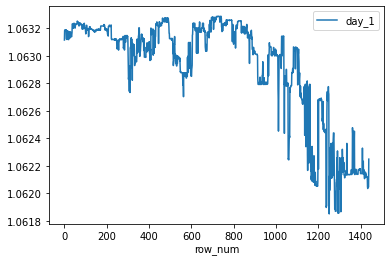

In [99]:

s.plot()

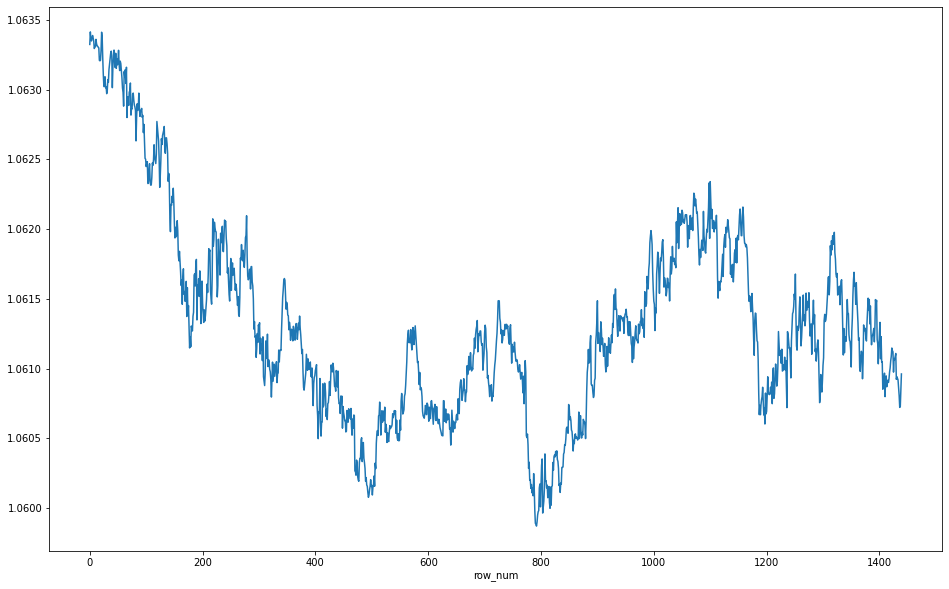

In [105]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

ax = y_pred.plot(figsize = (16, 10)) 

In [ ]:
#contrast leaderboard result of train and test data
predictor.leaderboard(df_train, silent=True)

In [ ]:
# predictor.unpersist_models('agModels-predict_day1')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
##undelete below if need to save a fresh model each run.
# %rm -rf agModels-predict_day1
# !ls